In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Dropout, GRU, Bidirectional

import warnings
warnings.filterwarnings("ignore")

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-01,133.960007,137.350006,133.710007,137.000000,137.000000,61529400,AMAZON
2023-11-02,138.729996,138.809998,136.470001,138.070007,138.070007,52236700,AMAZON
2023-11-03,138.990005,139.490005,137.449997,138.600006,138.600006,44007200,AMAZON
2023-11-06,138.759995,140.729996,138.360001,139.740005,139.740005,44970400,AMAZON
2023-11-07,140.550003,143.369995,140.500000,142.710007,142.710007,53553500,AMAZON
2023-11-08,142.970001,143.119995,141.220001,142.080002,142.080002,44521700,AMAZON
2023-11-09,142.020004,142.649994,139.839996,140.600006,140.600006,36235400,AMAZON
2023-11-10,140.460007,143.649994,139.910004,143.559998,143.559998,49287800,AMAZON
2023-11-13,142.080002,143.229996,140.669998,142.589996,142.589996,35680600,AMAZON


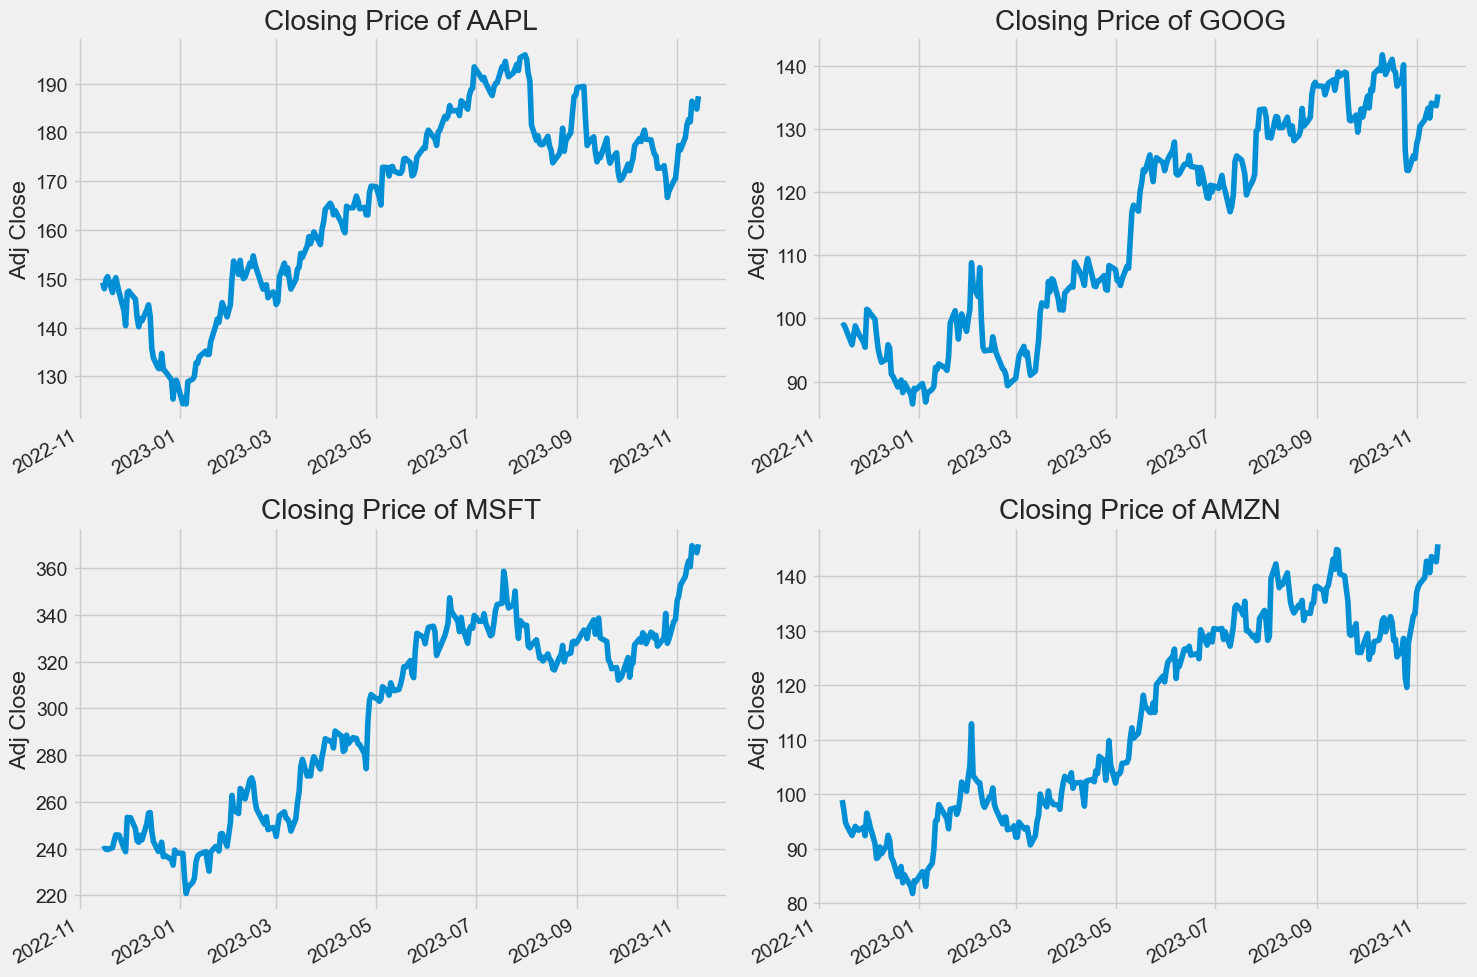

In [2]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

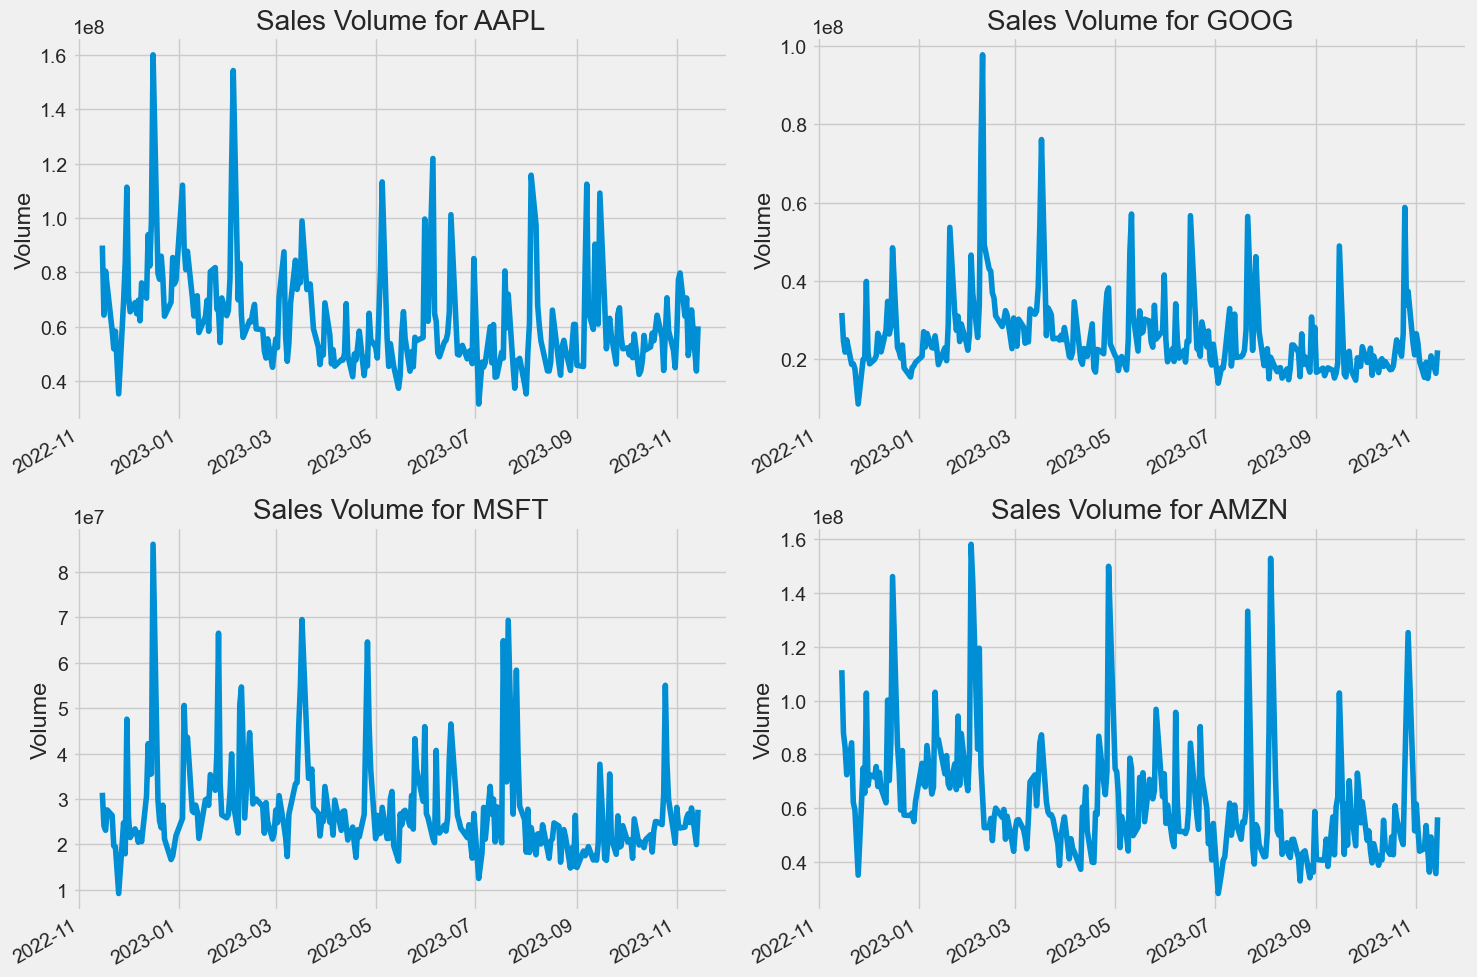

In [3]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

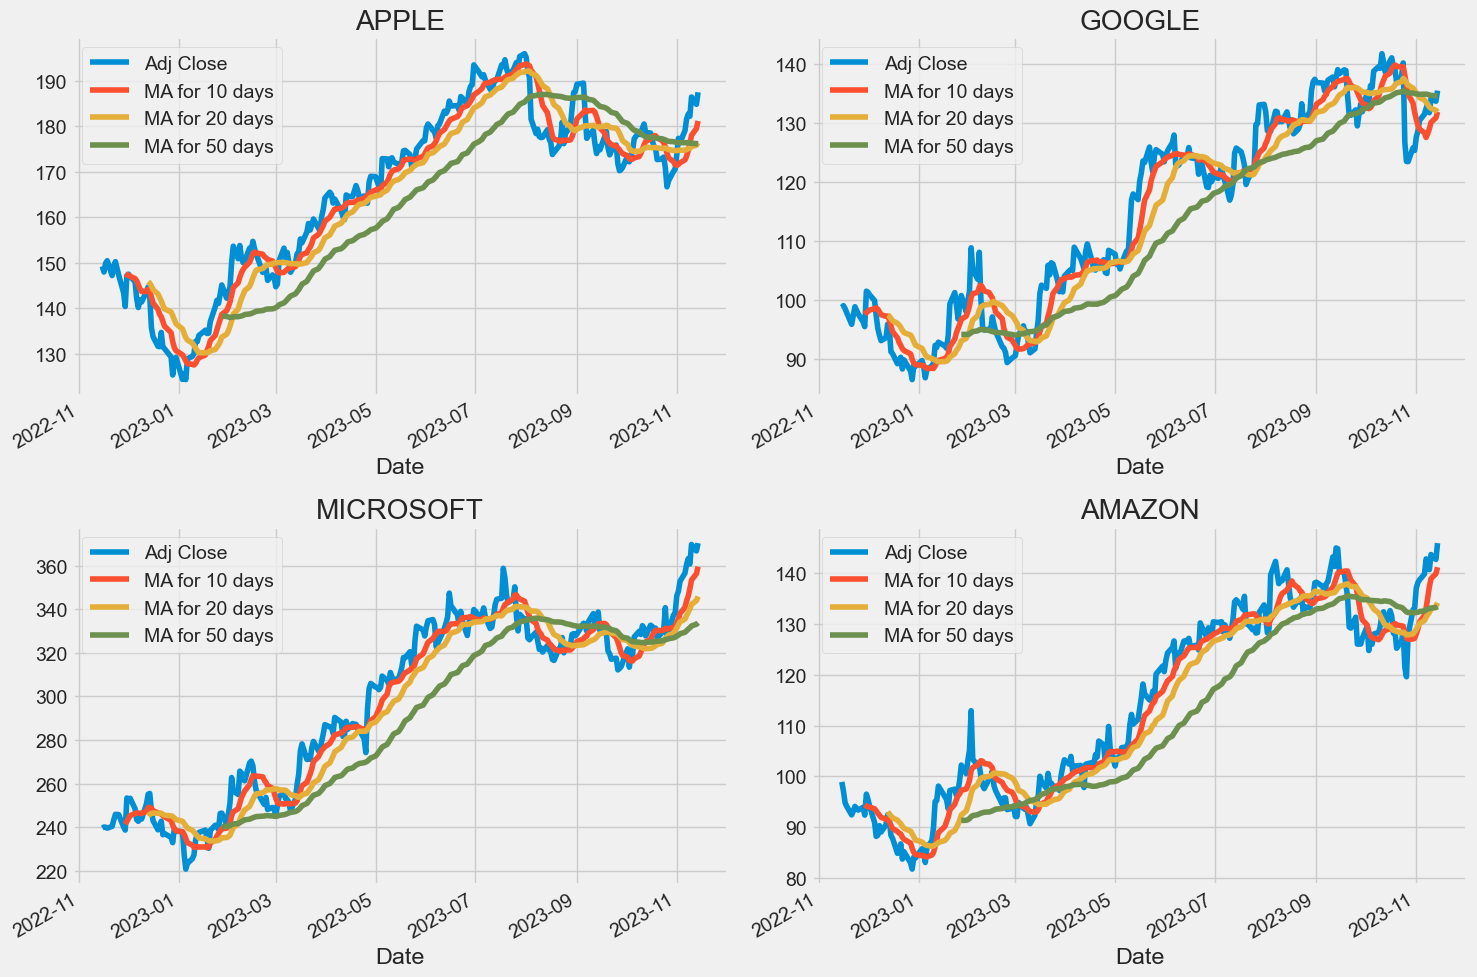

In [4]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# Apple stock

In [5]:
# Get the stock quote
apple_df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show the data
apple_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.449690,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.516596,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.655557,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.787855,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.767569,394024400
...,...,...,...,...,...,...
2023-11-08,182.350006,183.449997,181.589996,182.889999,182.649368,49340300
2023-11-09,182.960007,184.119995,181.809998,182.410004,182.169998,53763500
2023-11-10,183.970001,186.570007,183.529999,186.399994,186.399994,66133400


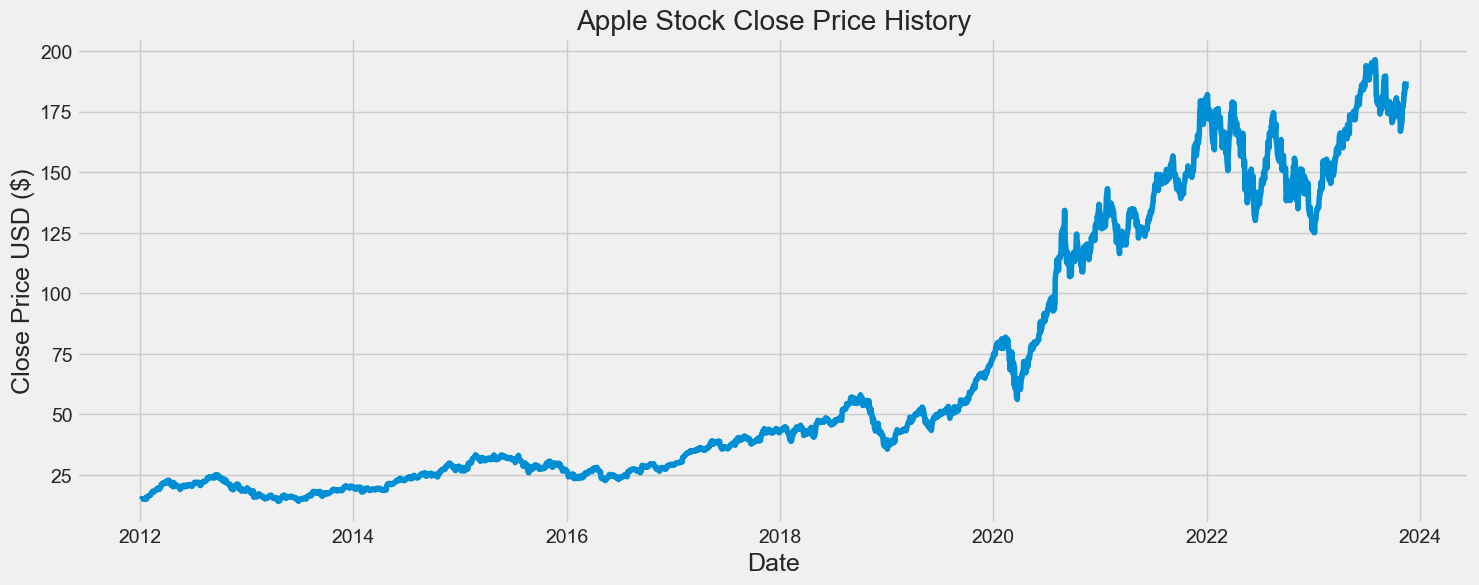

In [6]:
plt.figure(figsize=(16,6))
plt.title('Apple Stock Close Price History')
plt.plot(apple_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [7]:
# Create a new dataframe with only the 'Close column 
apple_data = apple_df.filter(['Close'])
# Convert the dataframe to a numpy array
apple_dataset = apple_data.values

In [8]:
# Create Train, Validation, and Test dataset
apple_length_data = len(apple_dataset)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
apple_length_bigtrain = round(apple_length_data * split_ratio)
apple_length_train = round(apple_length_bigtrain * split_ratio)
apple_length_validation = apple_length_bigtrain - apple_length_train
apple_length_test = apple_length_data - apple_length_bigtrain
print("Data length :", apple_length_data)
print("Train data length :", apple_length_train)
print("Validation data length :", apple_length_validation)
print("Test data length :", apple_length_test)

Data length : 2987
Train data length : 1464
Validation data length : 627
Test data length : 896


In [9]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
apple_scaled_data = scaler.fit_transform(apple_dataset)

apple_scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.94493224],
       [0.93616529],
       [0.95063084]])

In [10]:
apple_train_data = apple_scaled_data[:apple_length_train]
apple_val_data = apple_scaled_data[apple_length_train:apple_length_train+apple_length_validation]
apple_test_data = apple_scaled_data[apple_length_train+apple_length_validation:]
print(len(apple_train_data))
print(len(apple_val_data))
print(len(apple_test_data))

1464
627
896


In [11]:
# Create train data
apple_X_train = []
apple_y_train = []

time_step = 60

for i in range(time_step, apple_length_train):
    apple_X_train.append(apple_train_data[i-time_step:i,0])
    apple_y_train.append(apple_train_data[i,0])
    
# convert list to array
apple_X_train, apple_y_train = np.array(apple_X_train), np.array(apple_y_train)

print("Shape of X_train before reshape :",apple_X_train.shape)
print("Shape of y_train before reshape :",apple_y_train.shape)


apple_X_train = np.reshape(apple_X_train, (apple_X_train.shape[0], apple_X_train.shape[1],1))
apple_y_train = np.reshape(apple_y_train, (apple_y_train.shape[0],1))

print("Shape of X_train after reshape :",apple_X_train.shape)
print("Shape of y_train after reshape :",apple_y_train.shape)

Shape of X_train before reshape : (1404, 60)
Shape of y_train before reshape : (1404,)
Shape of X_train after reshape : (1404, 60, 1)
Shape of y_train after reshape : (1404, 1)


In [12]:
# Create validation data
apple_X_val = []
apple_y_val = []

time_step = 60

for i in range(time_step, apple_length_validation):
    apple_X_val.append(apple_val_data[i-time_step:i,0])
    apple_y_val.append(apple_val_data[i,0])
    
# convert list to array
apple_X_val, apple_y_val = np.array(apple_X_val), np.array(apple_y_val)

print("Shape of X_val before reshape :",apple_X_val.shape)
print("Shape of y_val before reshape :",apple_y_val.shape)

apple_X_val = np.reshape(apple_X_val, (apple_X_val.shape[0], apple_X_val.shape[1],1))
apple_y_val = np.reshape(apple_y_val, (apple_y_val.shape[0],1))

print("Shape of X_val after reshape :",apple_X_val.shape)
print("Shape of y_val after reshape :",apple_y_val.shape)

Shape of X_val before reshape : (567, 60)
Shape of y_val before reshape : (567,)
Shape of X_val after reshape : (567, 60, 1)
Shape of y_val after reshape : (567, 1)


In [13]:
# Create test data
apple_X_test = []
apple_y_test = []

time_step = 60

for i in range(time_step, apple_length_test):
    apple_X_test.append(apple_test_data[i-time_step:i,0])
    apple_y_test.append(apple_test_data[i,0])
    
# convert list to array
apple_X_test, apple_y_test = np.array(apple_X_test), np.array(apple_y_test)

print("Shape of X_test before reshape :",apple_X_test.shape)
print("Shape of y_test before reshape :",apple_y_test.shape)

apple_X_test = np.reshape(apple_X_test, (apple_X_test.shape[0], apple_X_test.shape[1],1))
apple_y_test = np.reshape(apple_y_test, (apple_y_test.shape[0],1))

print("Shape of X_test after reshape :",apple_X_test.shape)
print("Shape of y_test after reshape :",apple_y_test.shape)

Shape of X_test before reshape : (836, 60)
Shape of y_test before reshape : (836,)
Shape of X_test after reshape : (836, 60, 1)
Shape of y_test after reshape : (836, 1)


## RNN

In [14]:
# RNN

# initializing the RNN
apple_model_RNN = Sequential()

# adding first RNN layer and dropout regulatization
apple_model_RNN.add(SimpleRNN(units = 60, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (apple_X_train.shape[1],1)))

apple_model_RNN.add(Dropout(0.2))

apple_model_RNN.add(SimpleRNN(units = 60))

apple_model_RNN.add(Dropout(0.2))

# adding the output layer
apple_model_RNN.add(Dense(units = 1))

# compiling RNN
apple_model_RNN.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["accuracy"])

# fitting the RNN
apple_history1 = apple_model_RNN.fit(apple_X_train, apple_y_train, epochs = 50, batch_size = 32)

Metal device set to: Apple M2
Epoch 1/50


2023-11-15 14:45:10.759684: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


44/44 [==============================] - 99s 2s/step - loss: 0.0164 - accuracy: 7.1225e-04
Epoch 2/50
44/44 [==============================] - 89s 2s/step - loss: 6.2328e-04 - accuracy: 7.1225e-04
Epoch 3/50
44/44 [==============================] - 90s 2s/step - loss: 3.0952e-04 - accuracy: 7.1225e-04
Epoch 4/50
44/44 [==============================] - 91s 2s/step - loss: 2.1314e-04 - accuracy: 7.1225e-04
Epoch 5/50
44/44 [==============================] - 91s 2s/step - loss: 1.6863e-04 - accuracy: 7.1225e-04
Epoch 6/50
44/44 [==============================] - 91s 2s/step - loss: 1.4967e-04 - accuracy: 7.1225e-04
Epoch 7/50
44/44 [==============================] - 91s 2s/step - loss: 1.2741e-04 - accuracy: 7.1225e-04
Epoch 8/50
44/44 [==============================] - 103s 2s/step - loss: 1.1040e-04 - accuracy: 7.1225e-04
Epoch 9/50
44/44 [==============================] - 93s 2s/step - loss: 9.8219e-05 - accuracy: 7.1225e-04
Epoch 10/50
44/44 [==============================] - 93s 2s/

In [15]:
# Get the models predicted price values 
apple_RNN_y_pred_val = apple_model_RNN.predict(apple_X_val)
apple_RNN_y_pred_val = scaler.inverse_transform(apple_RNN_y_pred_val)

# Get the root mean squared error (RMSE)
apple_y_val_inv = scaler.inverse_transform(apple_y_val)
apple_RNN_val_rmse = np.sqrt(np.mean(((apple_RNN_y_pred_val - apple_y_val_inv) ** 2)))

print("Apple RNN Validation RMSE :",apple_RNN_val_rmse)

18/18 [==============================] - 5s 237ms/step
Apple RNN Validation RMSE : 1.6508647516817294


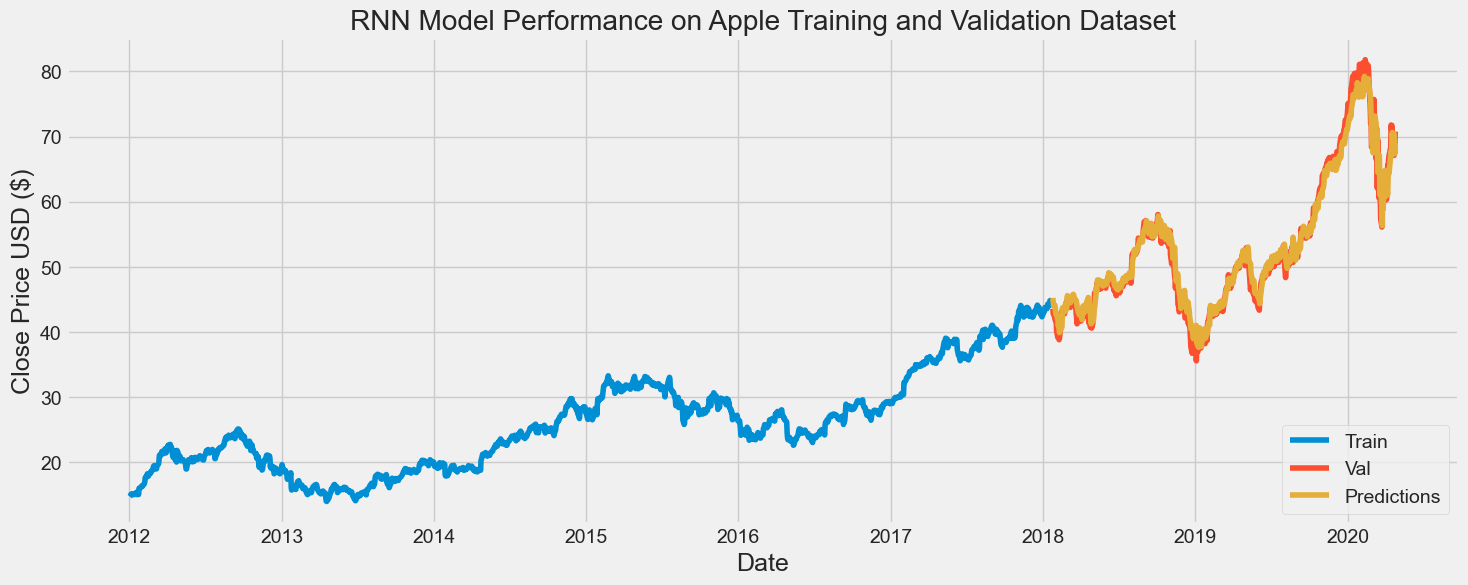

In [16]:
# Plot the data
apple_RNN_train = apple_data[:apple_length_train+60]
apple_RNN_valid = apple_data[apple_length_train+60:apple_length_train+apple_length_validation]
apple_RNN_valid['Predictions'] = apple_RNN_y_pred_val
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('RNN Model Performance on Apple Training and Validation Dataset')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(apple_RNN_train['Close'])
plt.plot(apple_RNN_valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [17]:
# Get the models predicted price values 
apple_RNN_y_pred_test = apple_model_RNN.predict(apple_X_test)
apple_RNN_y_pred_test = scaler.inverse_transform(apple_RNN_y_pred_test)

# Get the root mean squared error (RMSE)
apple_y_test_inv = scaler.inverse_transform(apple_y_test)
apple_RNN_test_rmse = np.sqrt(np.mean(((apple_RNN_y_pred_test - apple_y_test_inv) ** 2)))

print("Apple RNN Test RMSE :",apple_RNN_test_rmse)

27/27 [==============================] - 6s 229ms/step
Apple RNN Test RMSE : 25.95512394272581


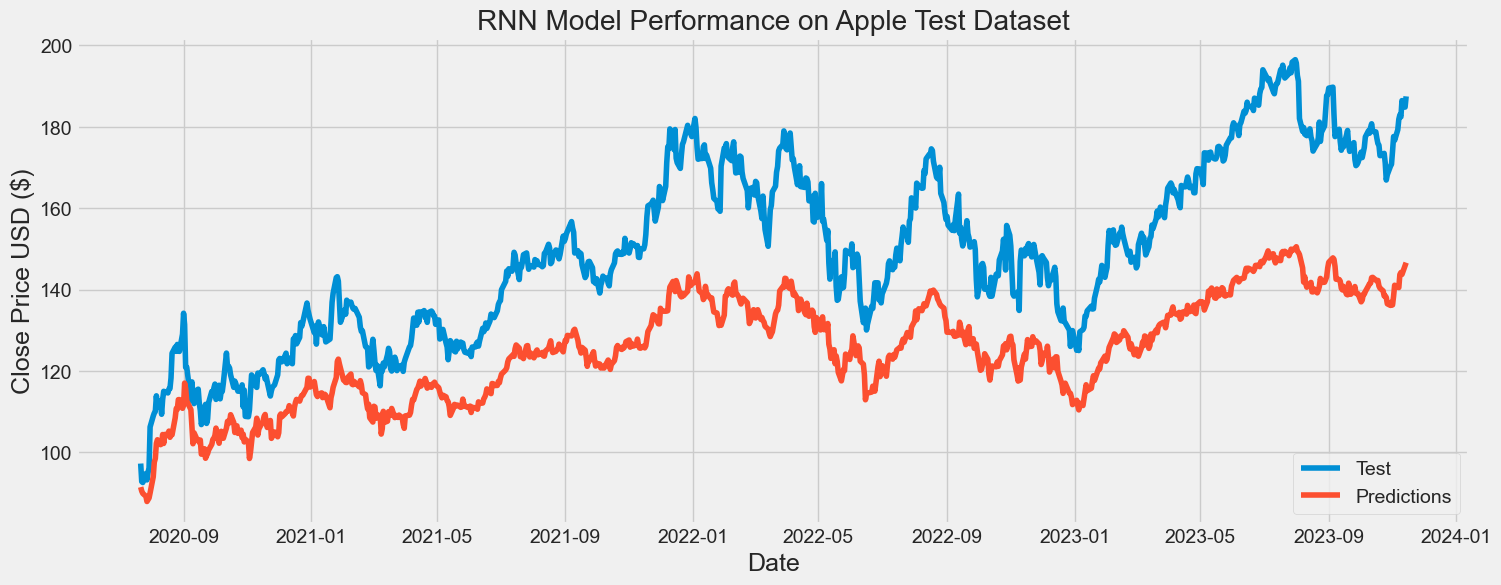

In [18]:
# Plot the data
apple_RNN_test = apple_data[apple_length_train+60+apple_length_validation:]
apple_RNN_test['Predictions'] = apple_RNN_y_pred_test
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('RNN Model Performance on Apple Test Dataset')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(apple_RNN_test['Close'])
plt.plot(apple_RNN_test['Predictions'])
plt.legend(['Test', 'Predictions'], loc='lower right')
plt.show()

## LSTM

In [19]:
# Build the LSTM model
apple_model_LSTM = Sequential()
apple_model_LSTM.add(LSTM(128, return_sequences=True, input_shape= (apple_X_train.shape[1], 1)))
apple_model_LSTM.add(LSTM(64, return_sequences=False))
apple_model_LSTM.add(Dense(25))
apple_model_LSTM.add(Dense(1))

# Compile the model
apple_model_LSTM.compile(optimizer='adam', loss='mean_squared_error', metrics = ["accuracy"])

# Train the model
apple_history2 = apple_model_LSTM.fit(apple_X_train, apple_y_train, batch_size=32, epochs=50)

Epoch 1/50
44/44 [==============================] - 7s 46ms/step - loss: 2.8710e-04 - accuracy: 7.1225e-04
Epoch 2/50
44/44 [==============================] - 1s 19ms/step - loss: 2.3862e-05 - accuracy: 7.1225e-04
Epoch 3/50
44/44 [==============================] - 1s 19ms/step - loss: 2.0797e-05 - accuracy: 7.1225e-04
Epoch 4/50
44/44 [==============================] - 1s 19ms/step - loss: 2.5556e-05 - accuracy: 7.1225e-04
Epoch 5/50
44/44 [==============================] - 1s 19ms/step - loss: 2.0004e-05 - accuracy: 7.1225e-04
Epoch 6/50
44/44 [==============================] - 1s 19ms/step - loss: 2.1287e-05 - accuracy: 7.1225e-04
Epoch 7/50
44/44 [==============================] - 1s 19ms/step - loss: 2.2570e-05 - accuracy: 7.1225e-04
Epoch 8/50
44/44 [==============================] - 1s 19ms/step - loss: 1.6899e-05 - accuracy: 7.1225e-04
Epoch 9/50
44/44 [==============================] - 1s 19ms/step - loss: 1.6561e-05 - accuracy: 7.1225e-04
Epoch 10/50
44/44 [==================

In [20]:
# Get the models predicted price values 
apple_LSTM_y_pred_val = apple_model_LSTM.predict(apple_X_val)
apple_LSTM_y_pred_val = scaler.inverse_transform(apple_LSTM_y_pred_val)

# Get the root mean squared error (RMSE)
apple_y_val_inv = scaler.inverse_transform(apple_y_val)
apple_LSTM_val_rmse = np.sqrt(np.mean(((apple_LSTM_y_pred_val - apple_y_val_inv) ** 2)))

print("Apple LSTM Validation RMSE :",apple_LSTM_val_rmse)

18/18 [==============================] - 2s 27ms/step
Apple LSTM Validation RMSE : 1.2825872722578477


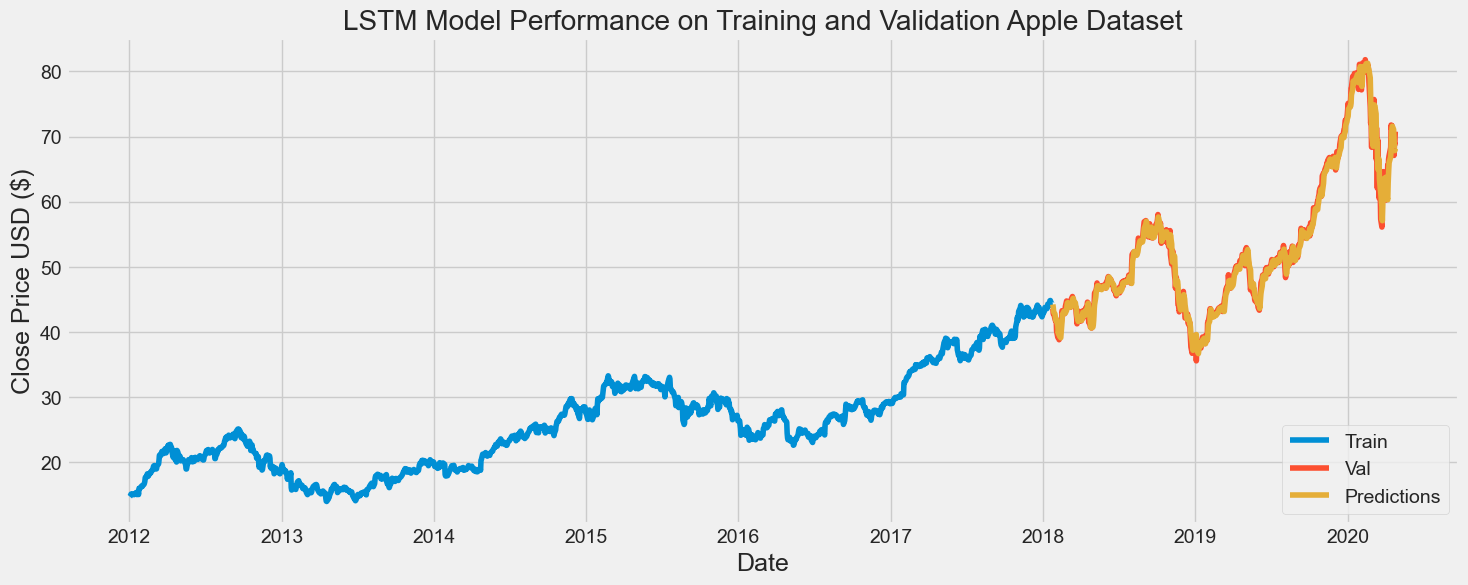

In [21]:
# Plot the data
apple_LSTM_train = apple_data[:apple_length_train+60]
apple_LSTM_valid = apple_data[apple_length_train+60:apple_length_train+apple_length_validation]
apple_LSTM_valid['Predictions'] = apple_LSTM_y_pred_val
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model Performance on Training and Validation Apple Dataset')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(apple_LSTM_train['Close'])
plt.plot(apple_LSTM_valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [22]:
# Get the models predicted price values 
apple_LSTM_y_pred_test = apple_model_LSTM.predict(apple_X_test)
apple_LSTM_y_pred_test = scaler.inverse_transform(apple_LSTM_y_pred_test)

# Get the root mean squared error (RMSE)
apple_y_test_inv = scaler.inverse_transform(apple_y_test)
apple_LSTM_test_rmse = np.sqrt(np.mean(((apple_LSTM_y_pred_test - apple_y_test_inv) ** 2)))

print("Apple LSTM Test RMSE :",apple_LSTM_test_rmse)

27/27 [==============================] - 1s 21ms/step
Apple LSTM Test RMSE : 3.0673722830555303


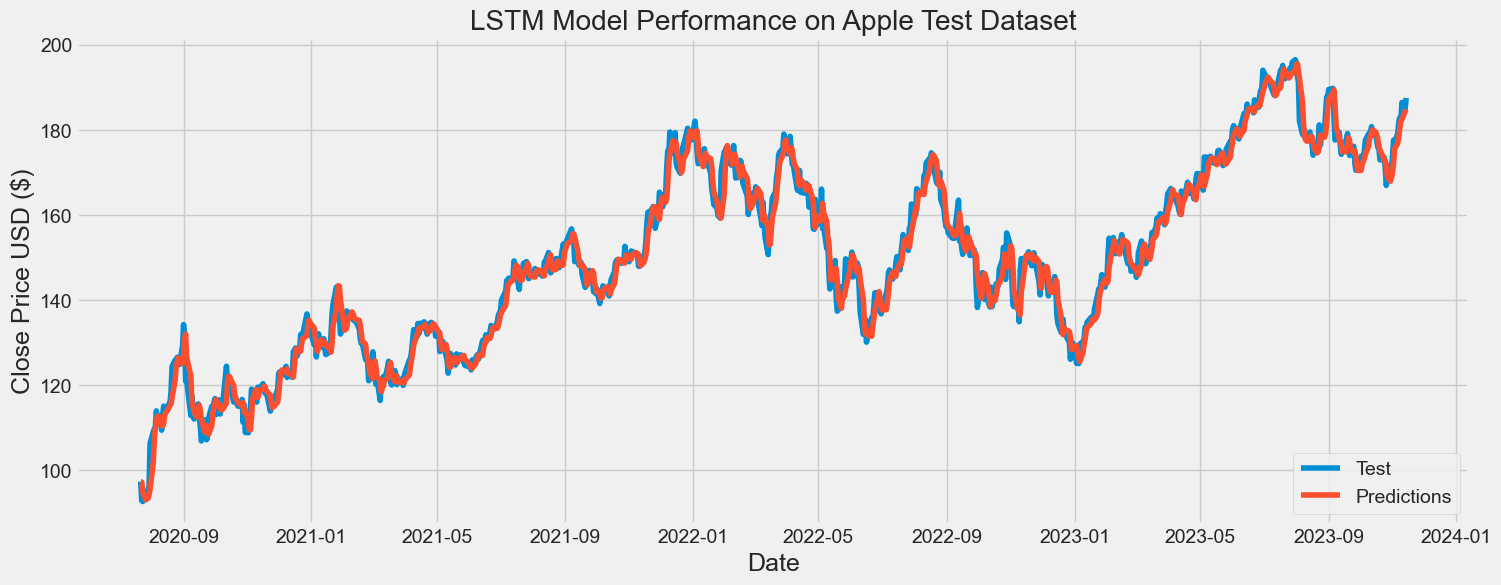

In [23]:
# Plot the data
apple_LSTM_test = apple_data[apple_length_train+60+apple_length_validation:]
apple_LSTM_test['Predictions'] = apple_LSTM_y_pred_test
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model Performance on Apple Test Dataset')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(apple_LSTM_test['Close'])
plt.plot(apple_LSTM_test['Predictions'])
plt.legend(['Test', 'Predictions'], loc='lower right')
plt.show()

## GRU

In [24]:
# The GRU architecture
apple_model_GRU = Sequential()
# First GRU layer with Dropout regularisation
apple_model_GRU.add(GRU(units=60, return_sequences=True, input_shape=(apple_X_train.shape[1],1), activation='tanh'))
apple_model_GRU.add(Dropout(0.2))
# Second GRU layer
apple_model_GRU.add(GRU(units=60, return_sequences=True, input_shape=(apple_X_train.shape[1],1), activation='tanh'))
apple_model_GRU.add(Dropout(0.2))
# Third GRU layer
apple_model_GRU.add(GRU(units=60, return_sequences=True, input_shape=(apple_X_train.shape[1],1), activation='tanh'))
apple_model_GRU.add(Dropout(0.2))
# Fourth GRU layer
apple_model_GRU.add(GRU(units=60, activation='tanh'))
apple_model_GRU.add(Dropout(0.2))
# The output layer
apple_model_GRU.add(Dense(units=1))

# compiling the model

apple_model_GRU.compile(optimizer='adam', loss='mean_squared_error', metrics = ["accuracy"])
# fitting the model

apple_history3 = apple_model_GRU.fit(apple_X_train, apple_y_train, epochs=50, batch_size=32)


Epoch 1/50
44/44 [==============================] - 11s 76ms/step - loss: 6.5868e-04 - accuracy: 7.1225e-04
Epoch 2/50
44/44 [==============================] - 1s 25ms/step - loss: 3.6813e-05 - accuracy: 7.1225e-04
Epoch 3/50
44/44 [==============================] - 1s 26ms/step - loss: 2.4593e-05 - accuracy: 7.1225e-04
Epoch 4/50
44/44 [==============================] - 1s 25ms/step - loss: 2.1894e-05 - accuracy: 7.1225e-04
Epoch 5/50
44/44 [==============================] - 1s 25ms/step - loss: 1.9891e-05 - accuracy: 7.1225e-04
Epoch 6/50
44/44 [==============================] - 1s 25ms/step - loss: 2.0074e-05 - accuracy: 7.1225e-04
Epoch 7/50
44/44 [==============================] - 1s 26ms/step - loss: 2.0888e-05 - accuracy: 7.1225e-04
Epoch 8/50
44/44 [==============================] - 1s 26ms/step - loss: 1.8200e-05 - accuracy: 7.1225e-04
Epoch 9/50
44/44 [==============================] - 1s 25ms/step - loss: 1.7741e-05 - accuracy: 7.1225e-04
Epoch 10/50
44/44 [=================

In [25]:
# Get the models predicted price values 
apple_GRU_y_pred_val = apple_model_GRU.predict(apple_X_val)
apple_GRU_y_pred_val = scaler.inverse_transform(apple_GRU_y_pred_val)

# Get the root mean squared error (RMSE)
apple_y_val_inv = scaler.inverse_transform(apple_y_val)
apple_GRU_val_rmse = np.sqrt(np.mean(((apple_GRU_y_pred_val - apple_y_val_inv) ** 2)))

print("Apple GRU Validation RMSE :",apple_GRU_val_rmse)

18/18 [==============================] - 3s 35ms/step
Apple GRU Validation RMSE : 1.8309898054391622


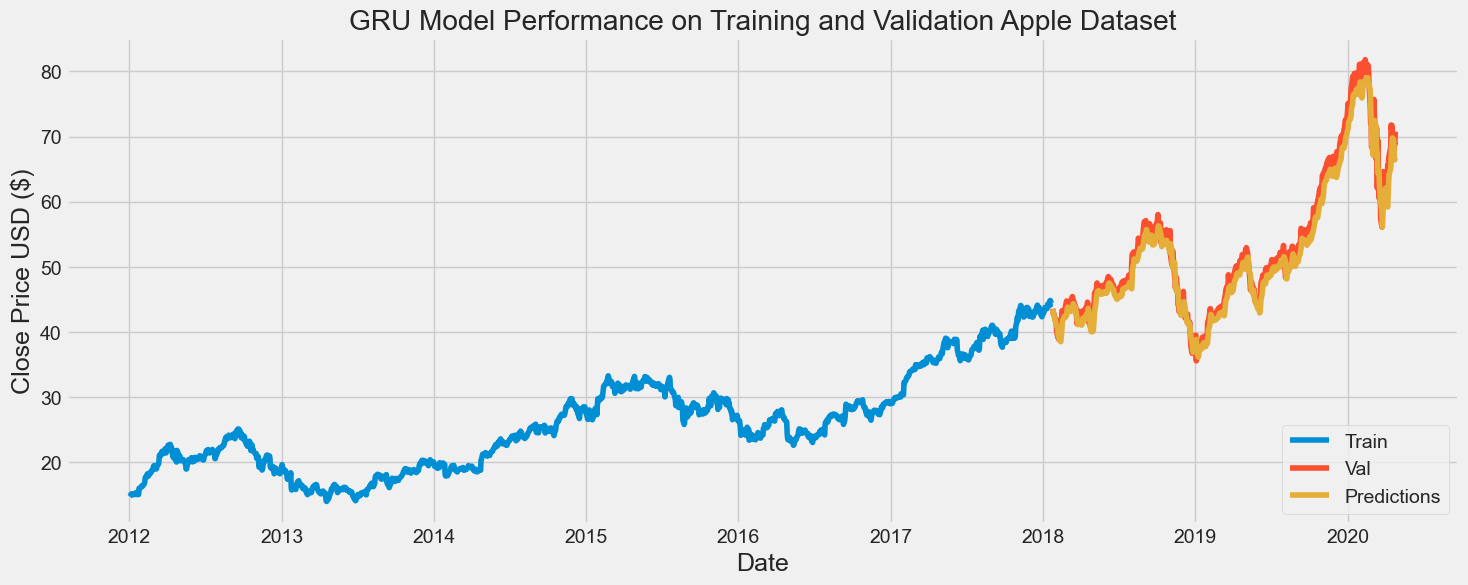

In [26]:
# Plot the data
apple_GRU_train = apple_data[:apple_length_train+60]
apple_GRU_valid = apple_data[apple_length_train+60:apple_length_train+apple_length_validation]
apple_GRU_valid['Predictions'] = apple_GRU_y_pred_val
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('GRU Model Performance on Training and Validation Apple Dataset')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(apple_GRU_train['Close'])
plt.plot(apple_GRU_valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [27]:
# Get the models predicted price values 
apple_GRU_y_pred_test = apple_model_GRU.predict(apple_X_test)
apple_GRU_y_pred_test = scaler.inverse_transform(apple_GRU_y_pred_test)

# Get the root mean squared error (RMSE)
apple_y_test_inv = scaler.inverse_transform(apple_y_test)
apple_GRU_test_rmse = np.sqrt(np.mean(((apple_GRU_y_pred_test - apple_y_test_inv) ** 2)))

print("Apple GRU Test RMSE :",apple_GRU_test_rmse)

27/27 [==============================] - 1s 27ms/step
Apple GRU Test RMSE : 7.873765932277417


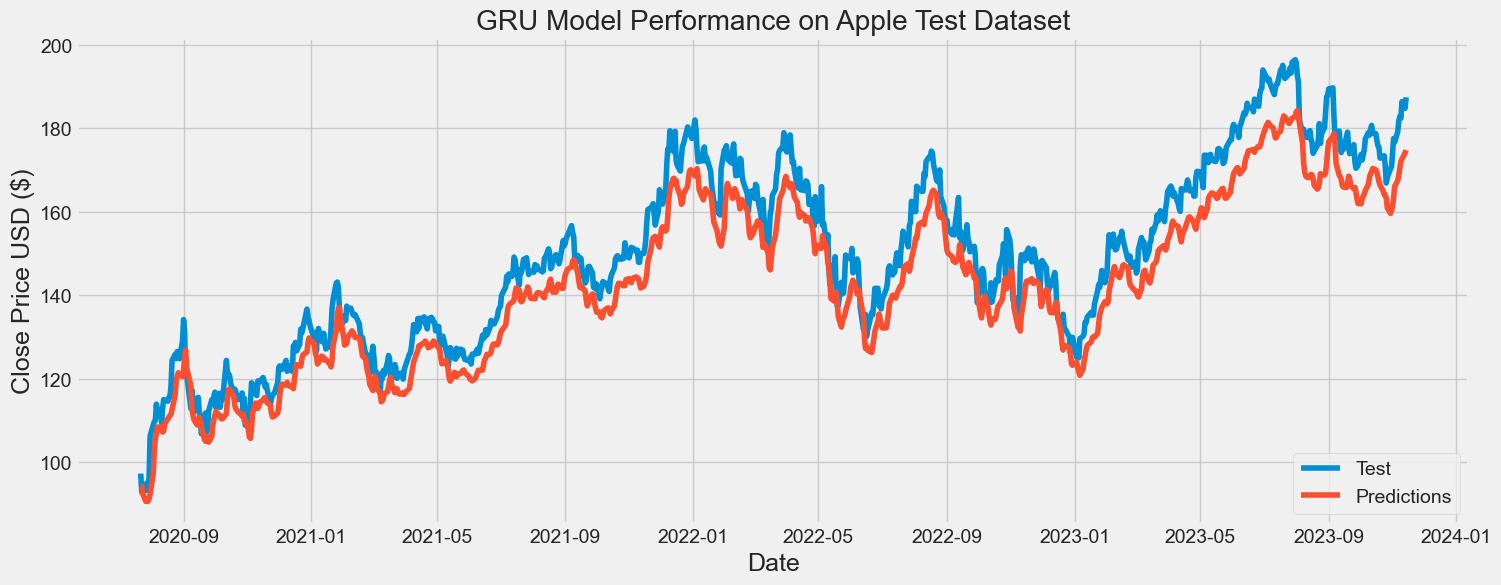

In [28]:
# Plot the data
apple_GRU_test = apple_data[apple_length_train+60+apple_length_validation:]
apple_GRU_test['Predictions'] = apple_GRU_y_pred_test
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('GRU Model Performance on Apple Test Dataset')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(apple_GRU_test['Close'])
plt.plot(apple_GRU_test['Predictions'])
plt.legend(['Test', 'Predictions'], loc='lower right')
plt.show()

# Google stock

In [29]:
# Get the stock quote
google_df = pdr.get_data_yahoo('GOOG', start='2012-01-01', end=datetime.now())
# Show the data
google_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2023-11-08,132.360001,133.539993,132.160004,133.259995,133.259995,15093600
2023-11-09,133.360001,133.960007,131.509995,131.690002,131.690002,17976500
2023-11-10,131.529999,134.270004,130.869995,134.059998,134.059998,20872900


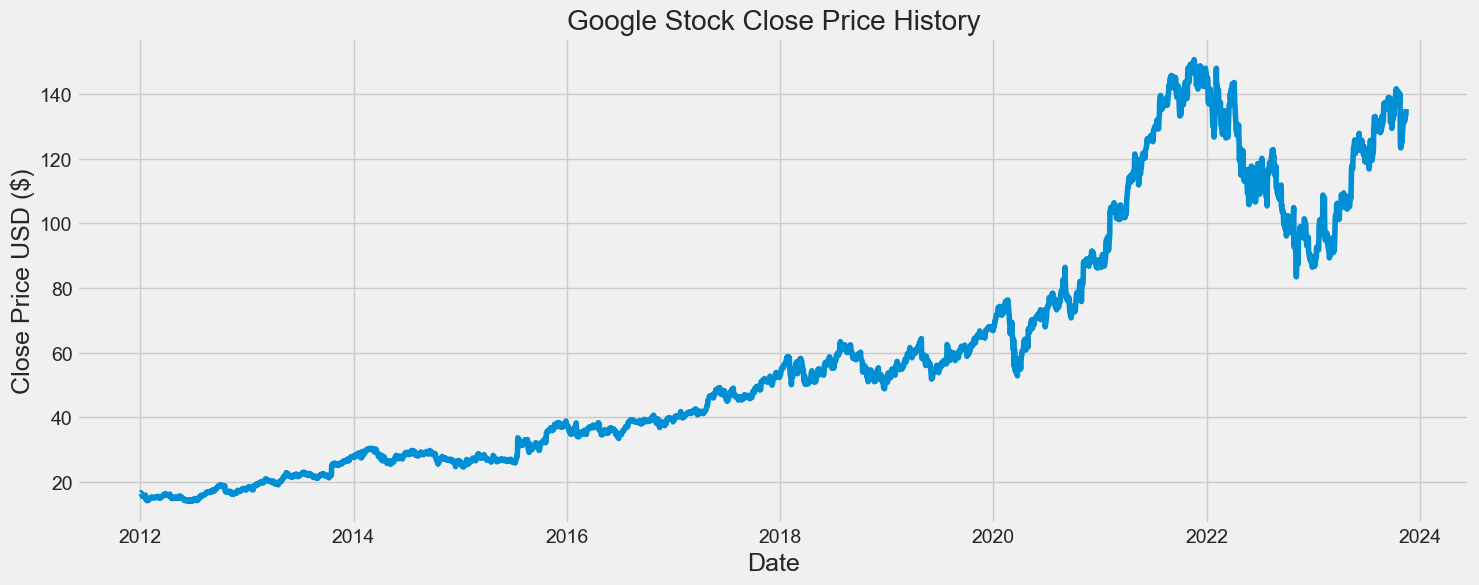

In [30]:
plt.figure(figsize=(16,6))
plt.title('Google Stock Close Price History')
plt.plot(google_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [31]:
# Create a new dataframe with only the 'Close column 
google_data = google_df.filter(['Close'])
# Convert the dataframe to a numpy array
google_dataset = google_data.values

In [32]:
# Create Train, Validation, and Test dataset
google_length_data = len(google_dataset)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
google_length_bigtrain = round(google_length_data * split_ratio)
google_length_train = round(google_length_bigtrain * split_ratio)
google_length_validation = google_length_bigtrain - google_length_train
google_length_test = google_length_data - google_length_bigtrain
print("Data length :", google_length_data)
print("Train data length :", google_length_train)
print("Validation data length :", google_length_validation)
print("Test data length :", google_length_test)

Data length : 2987
Train data length : 1464
Validation data length : 627
Test data length : 896


In [33]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
google_scaled_data = scaler.fit_transform(google_dataset)

google_scaled_data

array([[0.01936668],
       [0.01988927],
       [0.01820133],
       ...,
       [0.87828337],
       [0.87521287],
       [0.88829906]])

In [34]:
google_train_data = google_scaled_data[:google_length_train]
google_val_data = google_scaled_data[google_length_train:google_length_train+google_length_validation]
google_test_data = google_scaled_data[google_length_train+google_length_validation:]
print(len(google_train_data))
print(len(google_val_data))
print(len(google_test_data))

1464
627
896


In [35]:
# Create train data
google_X_train = []
google_y_train = []

time_step = 60

for i in range(time_step, google_length_train):
    google_X_train.append(google_train_data[i-time_step:i,0])
    google_y_train.append(google_train_data[i,0])
    
# convert list to array
google_X_train, google_y_train = np.array(google_X_train), np.array(google_y_train)

print("Shape of X_train before reshape :",google_X_train.shape)
print("Shape of y_train before reshape :",google_y_train.shape)


google_X_train = np.reshape(google_X_train, (google_X_train.shape[0], google_X_train.shape[1],1))
google_y_train = np.reshape(google_y_train, (google_y_train.shape[0],1))

print("Shape of X_train after reshape :",google_X_train.shape)
print("Shape of y_train after reshape :",google_y_train.shape)

Shape of X_train before reshape : (1404, 60)
Shape of y_train before reshape : (1404,)
Shape of X_train after reshape : (1404, 60, 1)
Shape of y_train after reshape : (1404, 1)


In [36]:
# Create validation data
google_X_val = []
google_y_val = []

time_step = 60

for i in range(time_step, google_length_validation):
    google_X_val.append(google_val_data[i-time_step:i,0])
    google_y_val.append(google_val_data[i,0])
    
# convert list to array
google_X_val, google_y_val = np.array(google_X_val), np.array(google_y_val)

print("Shape of X_val before reshape :",google_X_val.shape)
print("Shape of y_val before reshape :",google_y_val.shape)

google_X_val = np.reshape(google_X_val, (google_X_val.shape[0], google_X_val.shape[1],1))
google_y_val = np.reshape(google_y_val, (google_y_val.shape[0],1))

print("Shape of X_val after reshape :",google_X_val.shape)
print("Shape of y_val after reshape :",google_y_val.shape)

Shape of X_val before reshape : (567, 60)
Shape of y_val before reshape : (567,)
Shape of X_val after reshape : (567, 60, 1)
Shape of y_val after reshape : (567, 1)


In [37]:
# Create test data
google_X_test = []
google_y_test = []

time_step = 60

for i in range(time_step, google_length_test):
    google_X_test.append(google_test_data[i-time_step:i,0])
    google_y_test.append(google_test_data[i,0])
    
# convert list to array
google_X_test, google_y_test = np.array(google_X_test), np.array(google_y_test)

print("Shape of X_test before reshape :",google_X_test.shape)
print("Shape of y_test before reshape :",google_y_test.shape)

google_X_test = np.reshape(google_X_test, (google_X_test.shape[0], google_X_test.shape[1],1))
google_y_test = np.reshape(google_y_test, (google_y_test.shape[0],1))

print("Shape of X_test after reshape :",google_X_test.shape)
print("Shape of y_test after reshape :",google_y_test.shape)

Shape of X_test before reshape : (836, 60)
Shape of y_test before reshape : (836,)
Shape of X_test after reshape : (836, 60, 1)
Shape of y_test after reshape : (836, 1)


## RNN

In [38]:
# RNN

# initializing the RNN
google_model_RNN = Sequential()

# adding first RNN layer and dropout regulatization
google_model_RNN.add(SimpleRNN(units = 60, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (google_X_train.shape[1],1)))

google_model_RNN.add(Dropout(0.2))

google_model_RNN.add(SimpleRNN(units = 60))

google_model_RNN.add(Dropout(0.2))

# adding the output layer
google_model_RNN.add(Dense(units = 1))

# compiling RNN
google_model_RNN.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["accuracy"])

# fitting the RNN
google_history1 = google_model_RNN.fit(google_X_train, google_y_train, epochs = 50, batch_size = 32)

Epoch 1/50
44/44 [==============================] - 102s 2s/step - loss: 0.0133 - accuracy: 7.1225e-04
Epoch 2/50
44/44 [==============================] - 100s 2s/step - loss: 5.2860e-04 - accuracy: 7.1225e-04
Epoch 3/50
44/44 [==============================] - 99s 2s/step - loss: 3.3936e-04 - accuracy: 7.1225e-04
Epoch 4/50
44/44 [==============================] - 98s 2s/step - loss: 2.8779e-04 - accuracy: 7.1225e-04
Epoch 5/50
44/44 [==============================] - 99s 2s/step - loss: 2.5283e-04 - accuracy: 7.1225e-04
Epoch 6/50
44/44 [==============================] - 99s 2s/step - loss: 1.8749e-04 - accuracy: 7.1225e-04
Epoch 7/50
44/44 [==============================] - 97s 2s/step - loss: 1.7459e-04 - accuracy: 7.1225e-04
Epoch 8/50
44/44 [==============================] - 97s 2s/step - loss: 1.5974e-04 - accuracy: 7.1225e-04
Epoch 9/50
44/44 [==============================] - 98s 2s/step - loss: 1.5018e-04 - accuracy: 7.1225e-04
Epoch 10/50
44/44 [=============================

In [39]:
# Get the models predicted price values 
google_RNN_y_pred_val = google_model_RNN.predict(google_X_val)
google_RNN_y_pred_val = scaler.inverse_transform(google_RNN_y_pred_val)

# Get the root mean squared error (RMSE)
google_y_val_inv = scaler.inverse_transform(google_y_val)
google_RNN_val_rmse = np.sqrt(np.mean(((google_RNN_y_pred_val - google_y_val_inv) ** 2)))

print("Google RNN Validation RMSE :",google_RNN_val_rmse)

18/18 [==============================] - 4s 229ms/step
Google RNN Validation RMSE : 1.3493125188530095


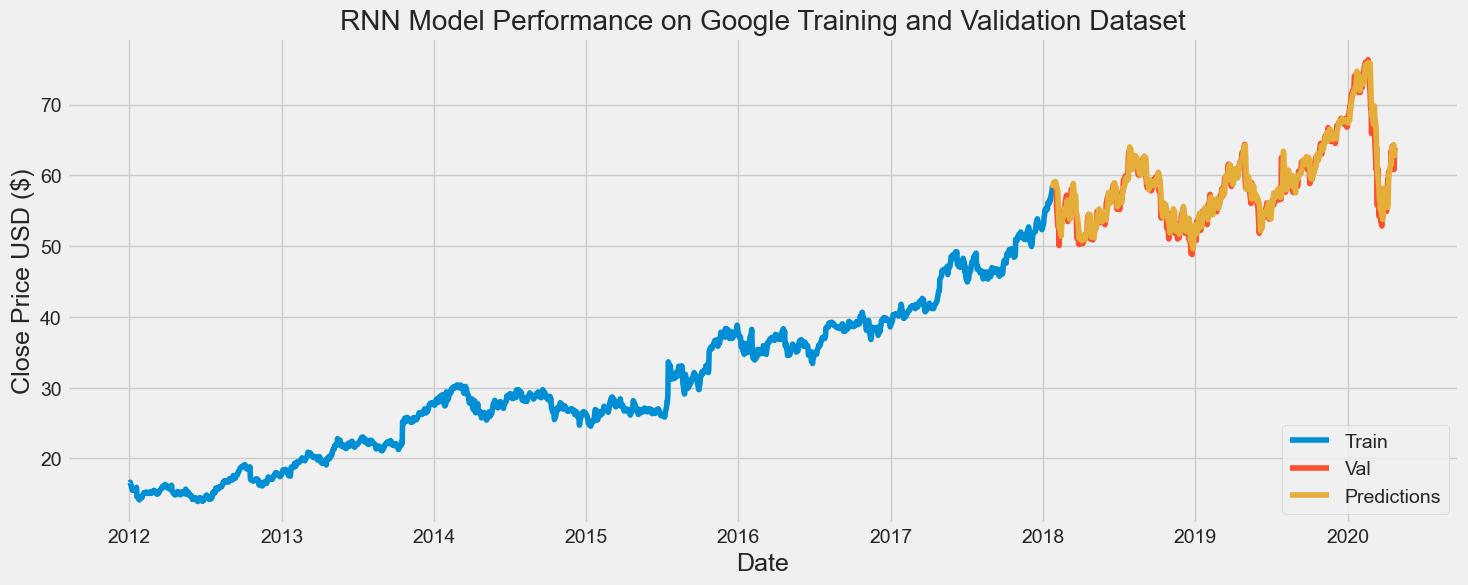

In [40]:
# Plot the data
google_RNN_train = google_data[:google_length_train+60]
google_RNN_valid = google_data[google_length_train+60:google_length_train+google_length_validation]
google_RNN_valid['Predictions'] = google_RNN_y_pred_val
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('RNN Model Performance on Google Training and Validation Dataset')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(google_RNN_train['Close'])
plt.plot(google_RNN_valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [41]:
# Get the models predicted price values 
google_RNN_y_pred_test = google_model_RNN.predict(google_X_test)
google_RNN_y_pred_test = scaler.inverse_transform(google_RNN_y_pred_test)

# Get the root mean squared error (RMSE)
google_y_test_inv = scaler.inverse_transform(google_y_test)
google_RNN_test_rmse = np.sqrt(np.mean(((google_RNN_y_pred_test - google_y_test_inv) ** 2)))

print("Google RNN Test RMSE :",google_RNN_test_rmse)

27/27 [==============================] - 6s 223ms/step
Google RNN Test RMSE : 4.286689163317093


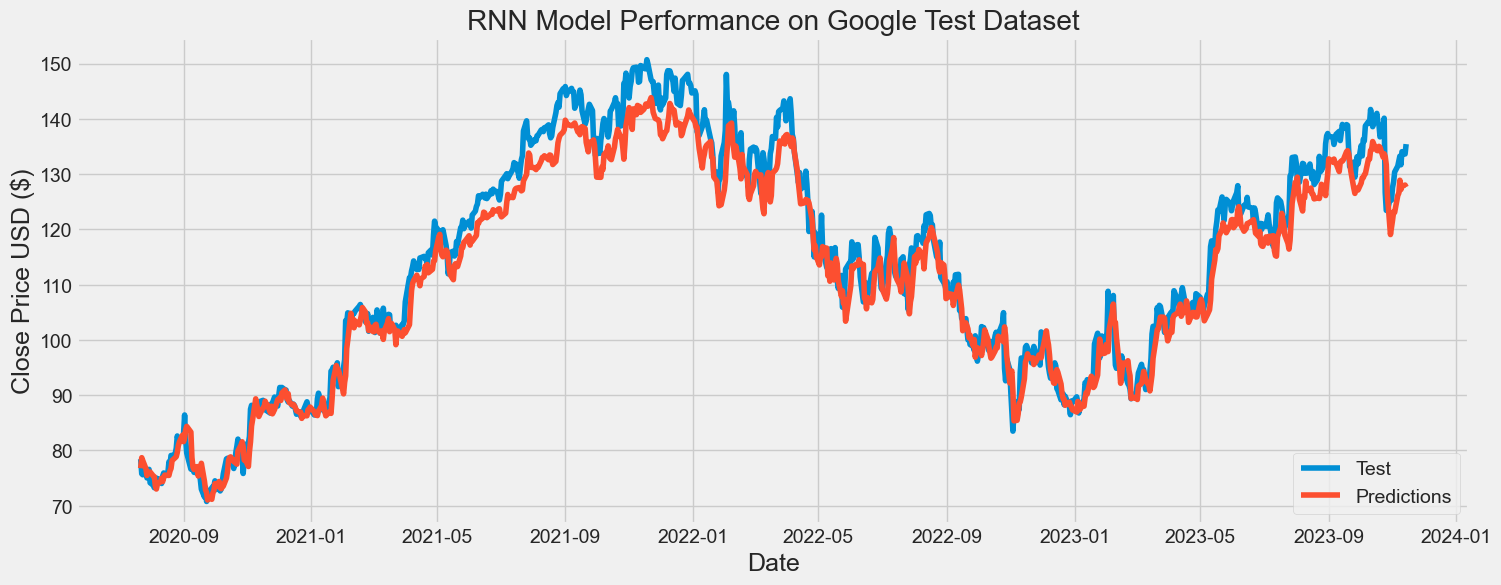

In [42]:
# Plot the data
google_RNN_test = google_data[google_length_train+60+google_length_validation:]
google_RNN_test['Predictions'] = google_RNN_y_pred_test
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('RNN Model Performance on Google Test Dataset')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(google_RNN_test['Close'])
plt.plot(google_RNN_test['Predictions'])
plt.legend(['Test', 'Predictions'], loc='lower right')
plt.show()

## LSTM

In [43]:
# Build the LSTM model
google_model_LSTM = Sequential()
google_model_LSTM.add(LSTM(128, return_sequences=True, input_shape= (google_X_train.shape[1], 1)))
google_model_LSTM.add(LSTM(64, return_sequences=False))
google_model_LSTM.add(Dense(25))
google_model_LSTM.add(Dense(1))

# Compile the model
google_model_LSTM.compile(optimizer='adam', loss='mean_squared_error', metrics = ["accuracy"])

# Train the model
google_history2 = google_model_LSTM.fit(google_X_train, google_y_train, batch_size=32, epochs=50)

Epoch 1/50
44/44 [==============================] - 7s 41ms/step - loss: 8.9232e-04 - accuracy: 7.1225e-04
Epoch 2/50
44/44 [==============================] - 1s 19ms/step - loss: 4.6934e-05 - accuracy: 7.1225e-04
Epoch 3/50
44/44 [==============================] - 1s 19ms/step - loss: 4.5014e-05 - accuracy: 7.1225e-04
Epoch 4/50
44/44 [==============================] - 1s 20ms/step - loss: 4.3400e-05 - accuracy: 7.1225e-04
Epoch 5/50
44/44 [==============================] - 1s 20ms/step - loss: 4.5315e-05 - accuracy: 7.1225e-04
Epoch 6/50
44/44 [==============================] - 1s 19ms/step - loss: 3.9598e-05 - accuracy: 7.1225e-04
Epoch 7/50
44/44 [==============================] - 1s 20ms/step - loss: 4.2016e-05 - accuracy: 7.1225e-04
Epoch 8/50
44/44 [==============================] - 1s 19ms/step - loss: 3.7979e-05 - accuracy: 7.1225e-04
Epoch 9/50
44/44 [==============================] - 1s 19ms/step - loss: 3.6060e-05 - accuracy: 7.1225e-04
Epoch 10/50
44/44 [==================

In [44]:
# Get the models predicted price values 
google_LSTM_y_pred_val = google_model_LSTM.predict(google_X_val)
google_LSTM_y_pred_val = scaler.inverse_transform(google_LSTM_y_pred_val)

# Get the root mean squared error (RMSE)
google_y_val_inv = scaler.inverse_transform(google_y_val)
google_LSTM_val_rmse = np.sqrt(np.mean((google_LSTM_y_pred_val - google_y_val_inv) ** 2))

print("Google LSTM Validation RMSE :",google_LSTM_val_rmse)

18/18 [==============================] - 2s 21ms/step
Google LSTM Validation RMSE : 1.2071034775781226


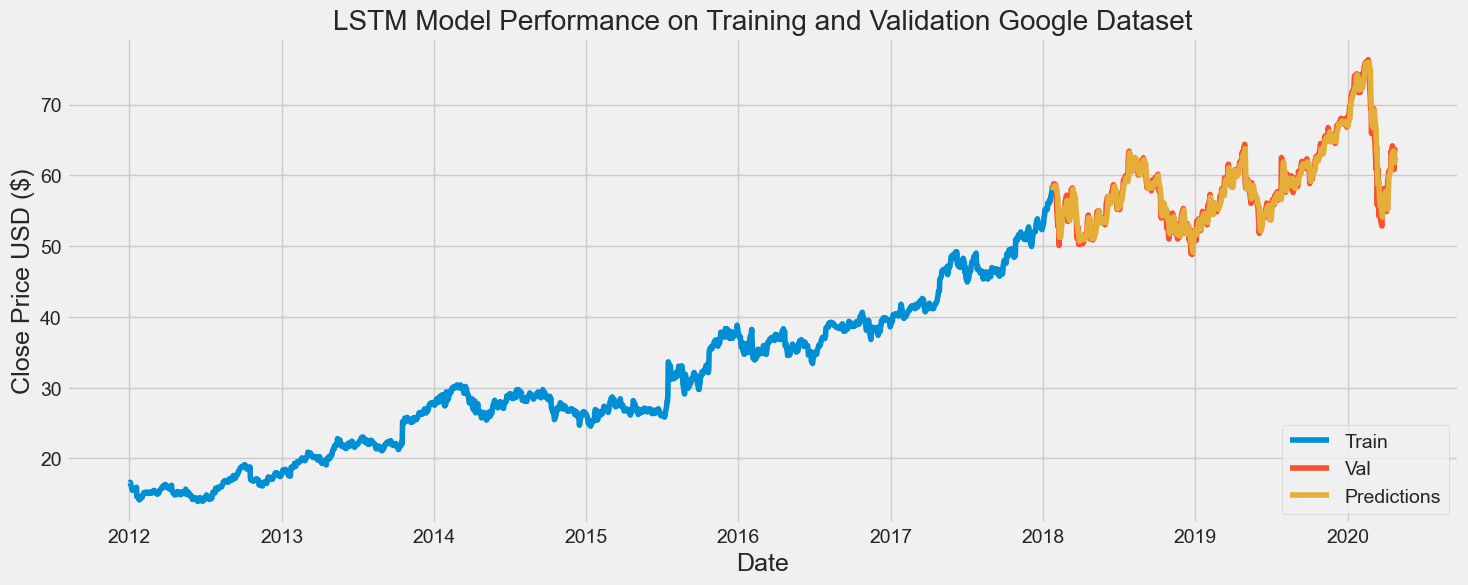

In [45]:
# Plot the data
google_LSTM_train = google_data[:google_length_train+60]
google_LSTM_valid = google_data[google_length_train+60:google_length_train+google_length_validation]
google_LSTM_valid['Predictions'] = google_LSTM_y_pred_val
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model Performance on Training and Validation Google Dataset')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(google_LSTM_train['Close'])
plt.plot(google_LSTM_valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [46]:
# Get the models predicted price values 
google_LSTM_y_pred_test = google_model_LSTM.predict(google_X_test)
google_LSTM_y_pred_test = scaler.inverse_transform(google_LSTM_y_pred_test)

# Get the root mean squared error (RMSE)
google_y_test_inv = scaler.inverse_transform(google_y_test)
google_LSTM_test_rmse = np.sqrt(np.mean(((google_LSTM_y_pred_test - google_y_test_inv) ** 2)))

print("Google LSTM Test RMSE :",google_LSTM_test_rmse)

27/27 [==============================] - 0s 16ms/step
Google LSTM Test RMSE : 2.506504129373988


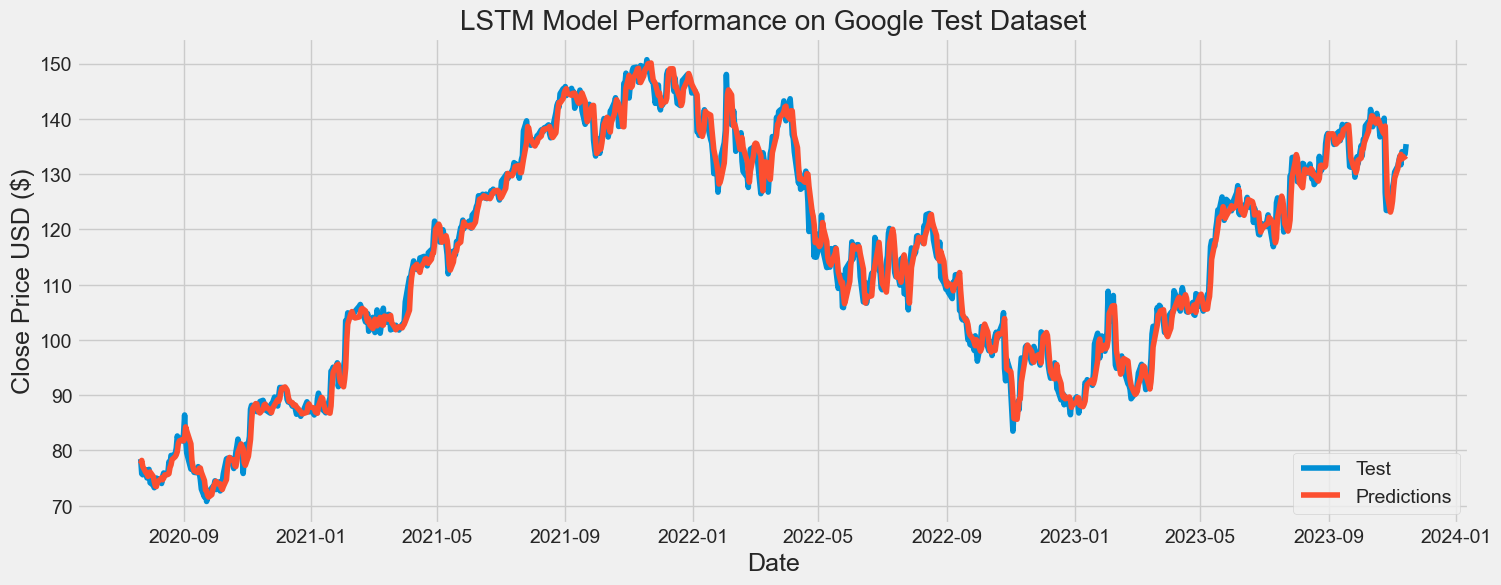

In [47]:
# Plot the data
google_LSTM_test = google_data[google_length_train+60+google_length_validation:]
google_LSTM_test['Predictions'] = google_LSTM_y_pred_test
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model Performance on Google Test Dataset')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(google_LSTM_test['Close'])
plt.plot(google_LSTM_test['Predictions'])
plt.legend(['Test', 'Predictions'], loc='lower right')
plt.show()

## GRU

In [48]:
# The GRU architecture
google_model_GRU = Sequential()
# First GRU layer with Dropout regularisation
google_model_GRU.add(GRU(units=60, return_sequences=True, input_shape=(google_X_train.shape[1],1), activation='tanh'))
google_model_GRU.add(Dropout(0.2))
# Second GRU layer
google_model_GRU.add(GRU(units=60, return_sequences=True, input_shape=(google_X_train.shape[1],1), activation='tanh'))
google_model_GRU.add(Dropout(0.2))
# Third GRU layer
google_model_GRU.add(GRU(units=60, return_sequences=True, input_shape=(google_X_train.shape[1],1), activation='tanh'))
google_model_GRU.add(Dropout(0.2))
# Fourth GRU layer
google_model_GRU.add(GRU(units=60, activation='tanh'))
google_model_GRU.add(Dropout(0.2))
# The output layer
google_model_GRU.add(Dense(units=1))

# compiling the model

google_model_GRU.compile(optimizer='adam', loss='mean_squared_error', metrics = ["accuracy"])
# fitting the model

google_history3 = google_model_GRU.fit(google_X_train, google_y_train, epochs=50, batch_size=32)


Epoch 1/50
44/44 [==============================] - 12s 83ms/step - loss: 0.0021 - accuracy: 7.1225e-04
Epoch 2/50
44/44 [==============================] - 1s 26ms/step - loss: 1.0070e-04 - accuracy: 7.1225e-04
Epoch 3/50
44/44 [==============================] - 1s 26ms/step - loss: 5.6520e-05 - accuracy: 7.1225e-04
Epoch 4/50
44/44 [==============================] - 1s 26ms/step - loss: 4.7346e-05 - accuracy: 7.1225e-04
Epoch 5/50
44/44 [==============================] - 1s 26ms/step - loss: 5.0234e-05 - accuracy: 7.1225e-04
Epoch 6/50
44/44 [==============================] - 1s 25ms/step - loss: 4.3350e-05 - accuracy: 7.1225e-04
Epoch 7/50
44/44 [==============================] - 1s 25ms/step - loss: 4.2728e-05 - accuracy: 7.1225e-04
Epoch 8/50
44/44 [==============================] - 1s 25ms/step - loss: 3.9053e-05 - accuracy: 7.1225e-04
Epoch 9/50
44/44 [==============================] - 1s 26ms/step - loss: 4.3357e-05 - accuracy: 7.1225e-04
Epoch 10/50
44/44 [=====================

In [49]:
# Get the models predicted price values 
google_GRU_y_pred_val = google_model_GRU.predict(google_X_val)
google_GRU_y_pred_val = scaler.inverse_transform(google_GRU_y_pred_val)

# Get the root mean squared error (RMSE)
google_y_val_inv = scaler.inverse_transform(google_y_val)
google_GRU_val_rmse = np.sqrt(np.mean(((google_GRU_y_pred_val - google_y_val_inv) ** 2)))

print("Google GRU Validation RMSE :",google_GRU_val_rmse)

18/18 [==============================] - 3s 35ms/step
Google GRU Validation RMSE : 3.2332416935786177


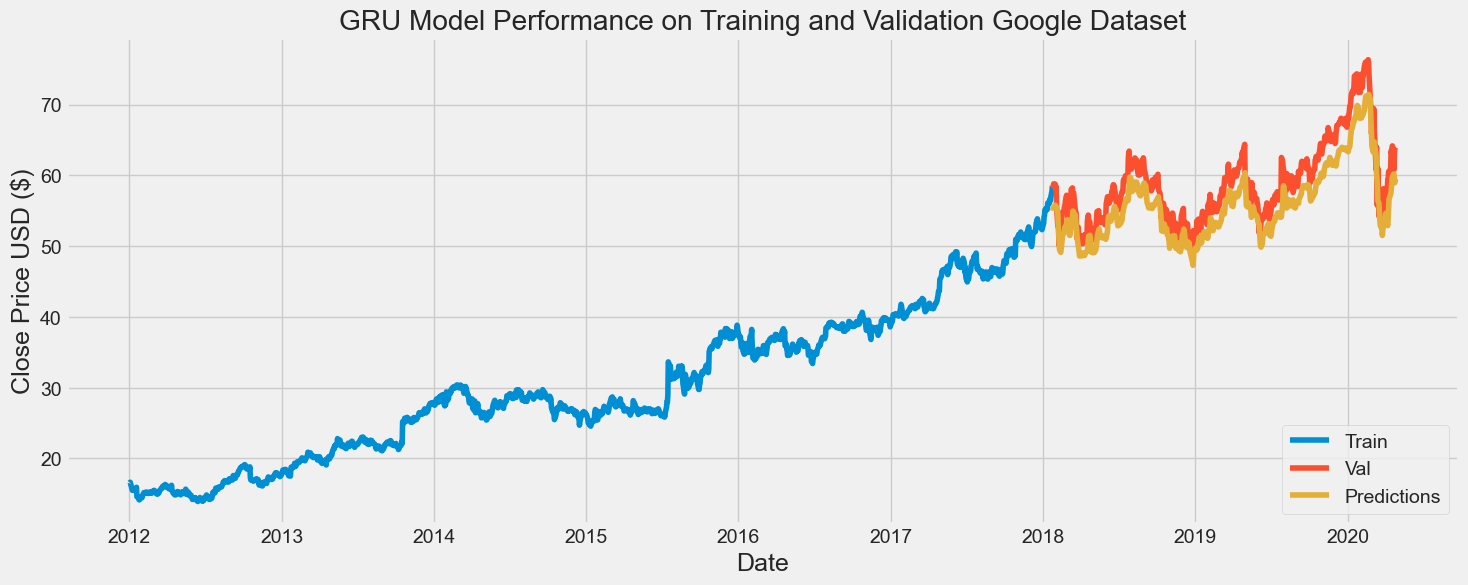

In [50]:
# Plot the data
google_GRU_train = google_data[:google_length_train+60]
google_GRU_valid = google_data[google_length_train+60:google_length_train+google_length_validation]
google_GRU_valid['Predictions'] = google_GRU_y_pred_val
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('GRU Model Performance on Training and Validation Google Dataset')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(google_GRU_train['Close'])
plt.plot(google_GRU_valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [51]:
# Get the models predicted price values 
google_GRU_y_pred_test = google_model_GRU.predict(google_X_test)
google_GRU_y_pred_test = scaler.inverse_transform(google_GRU_y_pred_test)

# Get the root mean squared error (RMSE)
google_y_test_inv = scaler.inverse_transform(google_y_test)
google_GRU_test_rmse = np.sqrt(np.mean(((google_GRU_y_pred_test - google_y_test_inv) ** 2)))

print("Google GRU Test RMSE :",google_GRU_test_rmse)

27/27 [==============================] - 1s 26ms/step
Google GRU Test RMSE : 10.369835288302053


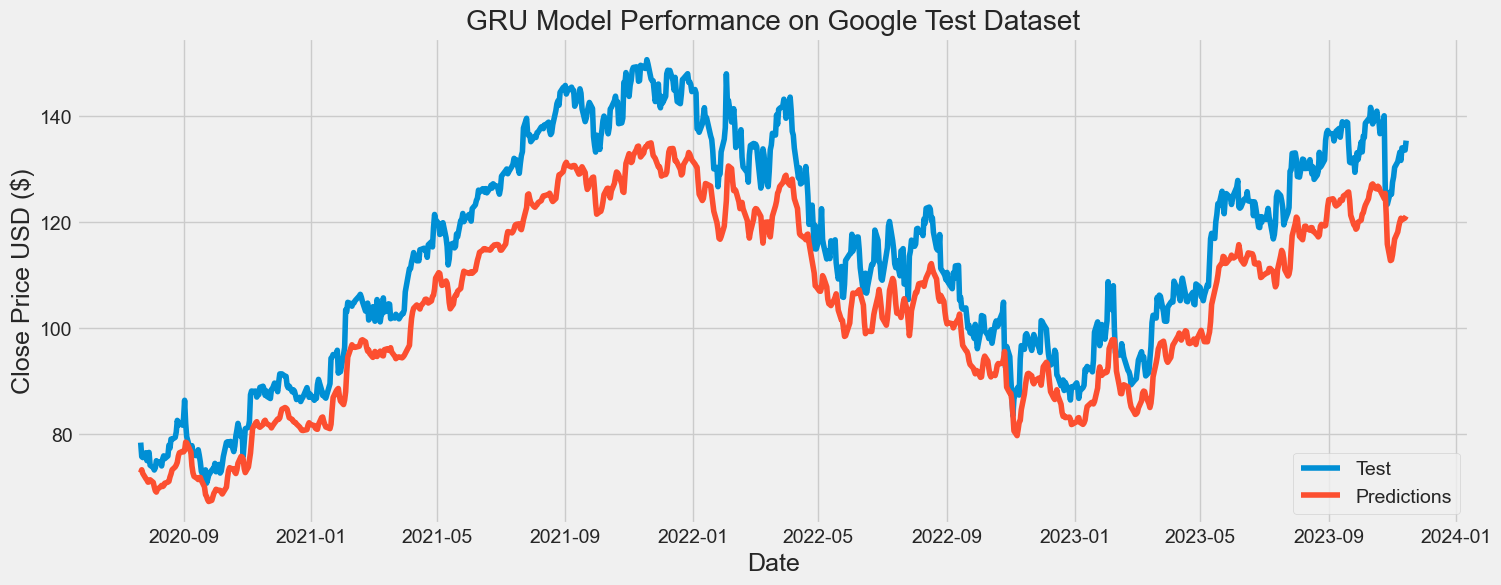

In [52]:
# Plot the data
google_GRU_test = google_data[google_length_train+60+google_length_validation:]
google_GRU_test['Predictions'] = google_GRU_y_pred_test
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('GRU Model Performance on Google Test Dataset')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(google_GRU_test['Close'])
plt.plot(google_GRU_test['Predictions'])
plt.legend(['Test', 'Predictions'], loc='lower right')
plt.show()

# Microsoft stock

In [53]:
# Get the stock quote
ms_df = pdr.get_data_yahoo('MSFT', start='2012-01-01', end=datetime.now())
# Show the data
ms_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000,21.321220,64731500
2012-01-04,26.820000,27.469999,26.780001,27.400000,21.822979,80516100
2012-01-05,27.379999,27.730000,27.290001,27.680000,22.045992,56081400
2012-01-06,27.530001,28.190001,27.530001,28.110001,22.388475,99455500
2012-01-09,28.049999,28.100000,27.719999,27.740000,22.093781,59706800
...,...,...,...,...,...,...
2023-11-08,361.679993,363.869995,360.549988,363.200012,363.200012,26767800
2023-11-09,362.299988,364.790009,360.359985,360.690002,360.690002,24847300
2023-11-10,361.489990,370.100006,361.070007,369.670013,369.670013,28042100


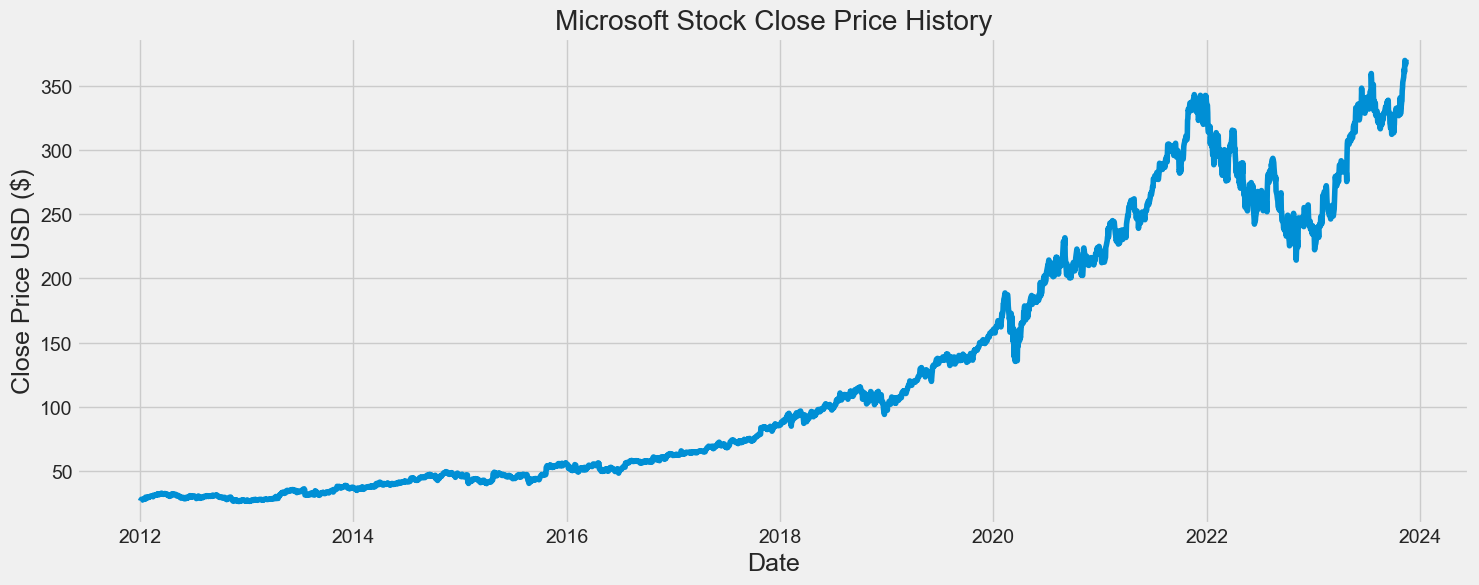

In [54]:
plt.figure(figsize=(16,6))
plt.title('Microsoft Stock Close Price History')
plt.plot(ms_df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [55]:
# Create a new dataframe with only the 'Close column 
ms_data = ms_df.filter(['Close'])
# Convert the dataframe to a numpy array
ms_dataset = ms_data.values

In [56]:
# Create Train, Validation, and Test dataset
ms_length_data = len(ms_dataset)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
ms_length_bigtrain = round(ms_length_data * split_ratio)
ms_length_train = round(ms_length_bigtrain * split_ratio)
ms_length_validation = ms_length_bigtrain - ms_length_train
ms_length_test = ms_length_data - ms_length_bigtrain
print("Data length :", ms_length_data)
print("Train data length :", ms_length_train)
print("Validation data length :", ms_length_validation)
print("Test data length :", ms_length_test)

Data length : 2987
Train data length : 1464
Validation data length : 627
Test data length : 896


In [57]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
ms_scaled_data = scaler.fit_transform(ms_dataset)

ms_scaled_data

array([[0.00116313],
       [0.00299505],
       [0.00380925],
       ...,
       [0.99825538],
       [0.98956093],
       [1.        ]])

In [58]:
ms_train_data = ms_scaled_data[:ms_length_train]
ms_val_data = ms_scaled_data[ms_length_train:ms_length_train+ms_length_validation]
ms_test_data = ms_scaled_data[ms_length_train+ms_length_validation:]
print(len(ms_train_data))
print(len(ms_val_data))
print(len(ms_test_data))

1464
627
896


In [59]:
# Create train data
ms_X_train = []
ms_y_train = []

time_step = 60

for i in range(time_step, ms_length_train):
    ms_X_train.append(ms_train_data[i-time_step:i,0])
    ms_y_train.append(ms_train_data[i,0])
    
# convert list to array
ms_X_train, ms_y_train = np.array(ms_X_train), np.array(ms_y_train)

print("Shape of X_train before reshape :",ms_X_train.shape)
print("Shape of y_train before reshape :",ms_y_train.shape)


ms_X_train = np.reshape(ms_X_train, (ms_X_train.shape[0], ms_X_train.shape[1],1))
ms_y_train = np.reshape(ms_y_train, (ms_y_train.shape[0],1))

print("Shape of X_train after reshape :",ms_X_train.shape)
print("Shape of y_train after reshape :",ms_y_train.shape)

Shape of X_train before reshape : (1404, 60)
Shape of y_train before reshape : (1404,)
Shape of X_train after reshape : (1404, 60, 1)
Shape of y_train after reshape : (1404, 1)


In [60]:
# Create validation data
ms_X_val = []
ms_y_val = []

time_step = 60

for i in range(time_step, ms_length_validation):
    ms_X_val.append(ms_val_data[i-time_step:i,0])
    ms_y_val.append(ms_val_data[i,0])
    
# convert list to array
ms_X_val, ms_y_val = np.array(ms_X_val), np.array(ms_y_val)

print("Shape of X_val before reshape :",ms_X_val.shape)
print("Shape of y_val before reshape :",ms_y_val.shape)

ms_X_val = np.reshape(ms_X_val, (ms_X_val.shape[0], ms_X_val.shape[1],1))
ms_y_val = np.reshape(ms_y_val, (ms_y_val.shape[0],1))

print("Shape of X_val after reshape :",ms_X_val.shape)
print("Shape of y_val after reshape :",ms_y_val.shape)

Shape of X_val before reshape : (567, 60)
Shape of y_val before reshape : (567,)
Shape of X_val after reshape : (567, 60, 1)
Shape of y_val after reshape : (567, 1)


In [61]:
# Create test data
ms_X_test = []
ms_y_test = []

time_step = 60

for i in range(time_step, ms_length_test):
    ms_X_test.append(ms_test_data[i-time_step:i,0])
    ms_y_test.append(ms_test_data[i,0])
    
# convert list to array
ms_X_test, ms_y_test = np.array(ms_X_test), np.array(ms_y_test)

print("Shape of X_test before reshape :",ms_X_test.shape)
print("Shape of y_test before reshape :",ms_y_test.shape)

ms_X_test = np.reshape(ms_X_test, (ms_X_test.shape[0], ms_X_test.shape[1],1))
ms_y_test = np.reshape(ms_y_test, (ms_y_test.shape[0],1))

print("Shape of X_test after reshape :",ms_X_test.shape)
print("Shape of y_test after reshape :",ms_y_test.shape)

Shape of X_test before reshape : (836, 60)
Shape of y_test before reshape : (836,)
Shape of X_test after reshape : (836, 60, 1)
Shape of y_test after reshape : (836, 1)


## RNN

In [62]:
# RNN

# initializing the RNN
ms_model_RNN = Sequential()

# adding first RNN layer and dropout regulatization
ms_model_RNN.add(SimpleRNN(units = 60, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (ms_X_train.shape[1],1)))

ms_model_RNN.add(Dropout(0.2))

ms_model_RNN.add(SimpleRNN(units = 60))

ms_model_RNN.add(Dropout(0.2))

# adding the output layer
ms_model_RNN.add(Dense(units = 1))

# compiling RNN
ms_model_RNN.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["accuracy"])

# fitting the RNN
ms_history1 = ms_model_RNN.fit(ms_X_train, ms_y_train, epochs = 50, batch_size = 32)

Epoch 1/50
44/44 [==============================] - 102s 2s/step - loss: 0.0096 - accuracy: 7.1225e-04
Epoch 2/50
44/44 [==============================] - 101s 2s/step - loss: 3.1735e-04 - accuracy: 7.1225e-04
Epoch 3/50
44/44 [==============================] - 126s 3s/step - loss: 2.3154e-04 - accuracy: 7.1225e-04
Epoch 4/50
44/44 [==============================] - 102s 2s/step - loss: 1.9308e-04 - accuracy: 7.1225e-04
Epoch 5/50
44/44 [==============================] - 100s 2s/step - loss: 1.4588e-04 - accuracy: 7.1225e-04
Epoch 6/50
44/44 [==============================] - 100s 2s/step - loss: 1.2280e-04 - accuracy: 7.1225e-04
Epoch 7/50
44/44 [==============================] - 98s 2s/step - loss: 1.2180e-04 - accuracy: 7.1225e-04
Epoch 8/50
44/44 [==============================] - 98s 2s/step - loss: 9.2121e-05 - accuracy: 7.1225e-04
Epoch 9/50
44/44 [==============================] - 100s 2s/step - loss: 8.4105e-05 - accuracy: 7.1225e-04
Epoch 10/50
44/44 [========================

In [63]:
# Get the models predicted price values 
ms_RNN_y_pred_val = ms_model_RNN.predict(ms_X_val)
ms_RNN_y_pred_val = scaler.inverse_transform(ms_RNN_y_pred_val)

# Get the root mean squared error (RMSE)
ms_y_val_inv = scaler.inverse_transform(ms_y_val)
ms_RNN_val_rmse = np.sqrt(np.mean(((ms_RNN_y_pred_val - ms_y_val_inv) ** 2)))

print("Microsoft RNN Validation RMSE :",ms_RNN_val_rmse)

18/18 [==============================] - 4s 229ms/step
Microsoft RNN Validation RMSE : 12.832381748020383


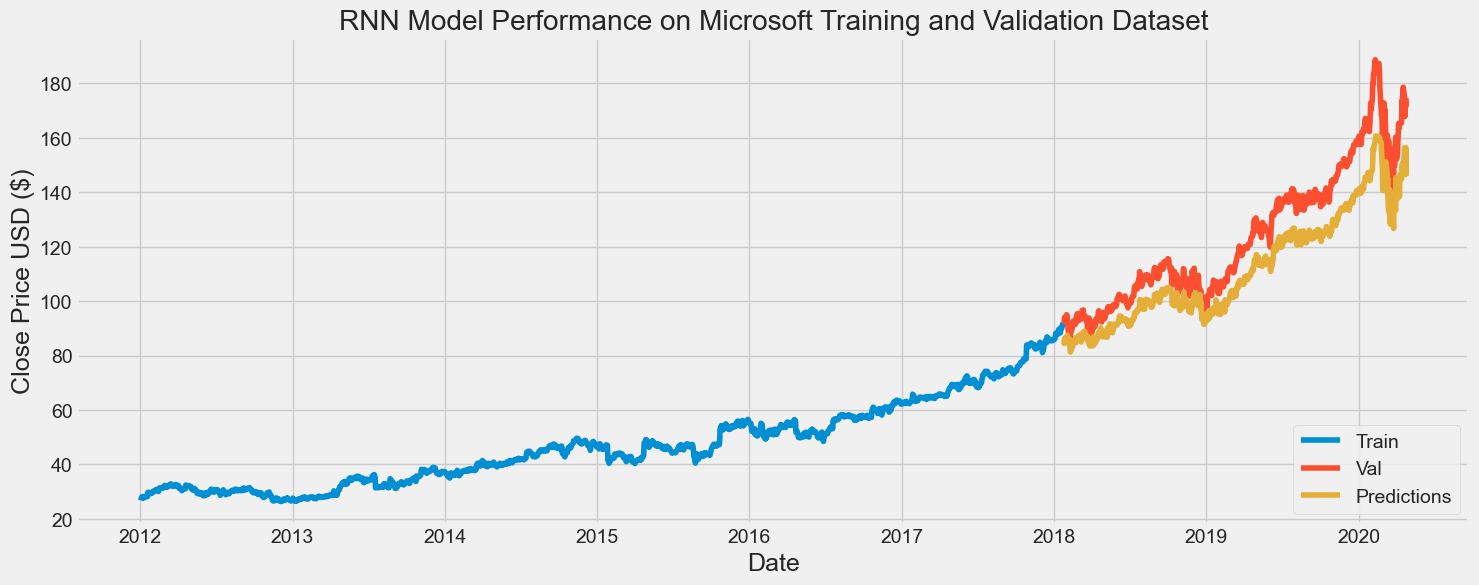

In [64]:
# Plot the data
ms_RNN_train = ms_data[:ms_length_train+60]
ms_RNN_valid = ms_data[ms_length_train+60:ms_length_train+ms_length_validation]
ms_RNN_valid['Predictions'] = ms_RNN_y_pred_val
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('RNN Model Performance on Microsoft Training and Validation Dataset')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(ms_RNN_train['Close'])
plt.plot(ms_RNN_valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [65]:
# Get the models predicted price values 
ms_RNN_y_pred_test = ms_model_RNN.predict(ms_X_test)
ms_RNN_y_pred_test = scaler.inverse_transform(ms_RNN_y_pred_test)

# Get the root mean squared error (RMSE)
ms_y_test_inv = scaler.inverse_transform(ms_y_test)
ms_RNN_test_rmse = np.sqrt(np.mean(((ms_RNN_y_pred_test - ms_y_test_inv) ** 2)))

print("Microsoft RNN Test RMSE :",ms_RNN_test_rmse)

27/27 [==============================] - 6s 223ms/step
Microsoft RNN Test RMSE : 55.29552536894514


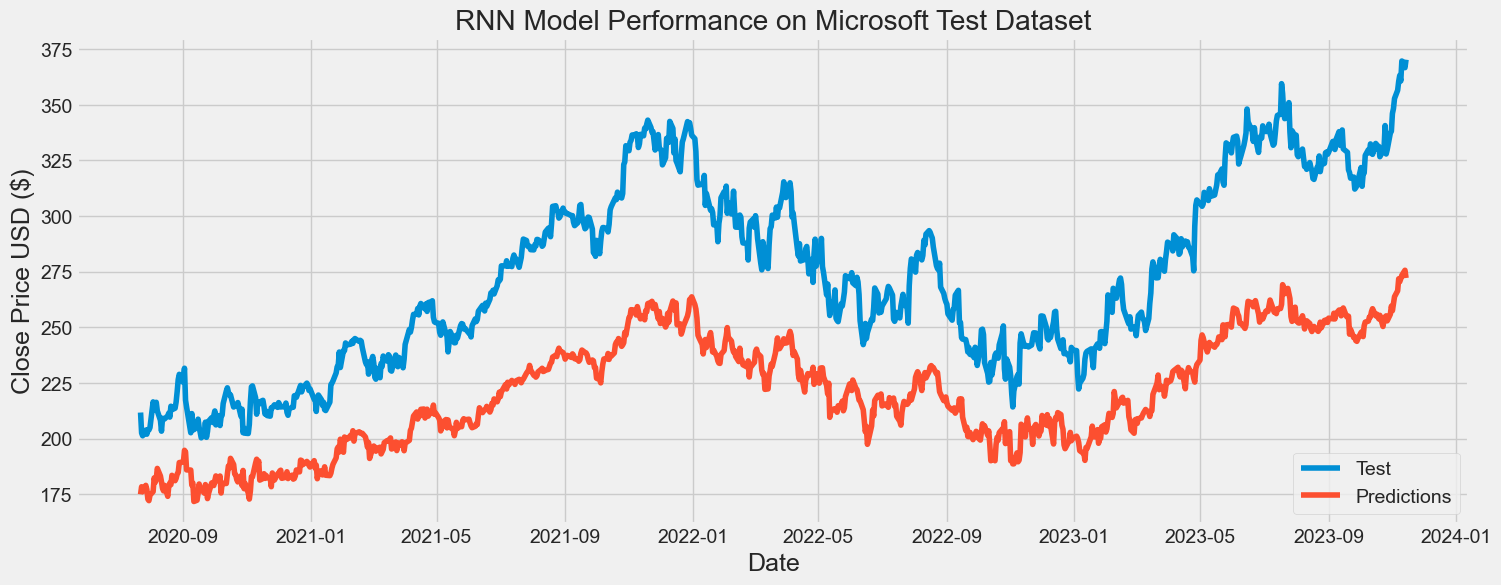

In [66]:
# Plot the data
ms_RNN_test = ms_data[ms_length_train+60+ms_length_validation:]
ms_RNN_test['Predictions'] = ms_RNN_y_pred_test
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('RNN Model Performance on Microsoft Test Dataset')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(ms_RNN_test['Close'])
plt.plot(ms_RNN_test['Predictions'])
plt.legend(['Test', 'Predictions'], loc='lower right')
plt.show()

## LSTM

In [67]:
# Build the LSTM model
ms_model_LSTM = Sequential()
ms_model_LSTM.add(LSTM(128, return_sequences=True, input_shape= (ms_X_train.shape[1], 1)))
ms_model_LSTM.add(LSTM(64, return_sequences=False))
ms_model_LSTM.add(Dense(25))
ms_model_LSTM.add(Dense(1))

# Compile the model
ms_model_LSTM.compile(optimizer='adam', loss='mean_squared_error', metrics = ["accuracy"])

# Train the model
ms_history2 = ms_model_LSTM.fit(ms_X_train, ms_y_train, batch_size=32, epochs=50)

Epoch 1/50
44/44 [==============================] - 7s 44ms/step - loss: 3.8007e-04 - accuracy: 7.1225e-04
Epoch 2/50
44/44 [==============================] - 1s 19ms/step - loss: 1.6450e-05 - accuracy: 7.1225e-04
Epoch 3/50
44/44 [==============================] - 1s 20ms/step - loss: 1.4462e-05 - accuracy: 7.1225e-04
Epoch 4/50
44/44 [==============================] - 1s 20ms/step - loss: 1.4761e-05 - accuracy: 7.1225e-04
Epoch 5/50
44/44 [==============================] - 1s 19ms/step - loss: 1.3905e-05 - accuracy: 7.1225e-04
Epoch 6/50
44/44 [==============================] - 1s 19ms/step - loss: 1.4683e-05 - accuracy: 7.1225e-04
Epoch 7/50
44/44 [==============================] - 1s 19ms/step - loss: 1.3439e-05 - accuracy: 7.1225e-04
Epoch 8/50
44/44 [==============================] - 1s 19ms/step - loss: 1.3074e-05 - accuracy: 7.1225e-04
Epoch 9/50
44/44 [==============================] - 1s 20ms/step - loss: 1.3330e-05 - accuracy: 7.1225e-04
Epoch 10/50
44/44 [==================

In [68]:
# Get the models predicted price values 
ms_LSTM_y_pred_val = ms_model_LSTM.predict(ms_X_val)
ms_LSTM_y_pred_val = scaler.inverse_transform(ms_LSTM_y_pred_val)

# Get the root mean squared error (RMSE)
ms_y_val_inv = scaler.inverse_transform(ms_y_val)
ms_LSTM_val_rmse = np.sqrt(np.mean((ms_LSTM_y_pred_val - ms_y_val_inv) ** 2))

print("Microsoft LSTM Validation RMSE :",ms_LSTM_val_rmse)

18/18 [==============================] - 2s 22ms/step
Microsoft LSTM Validation RMSE : 3.2938352882386477


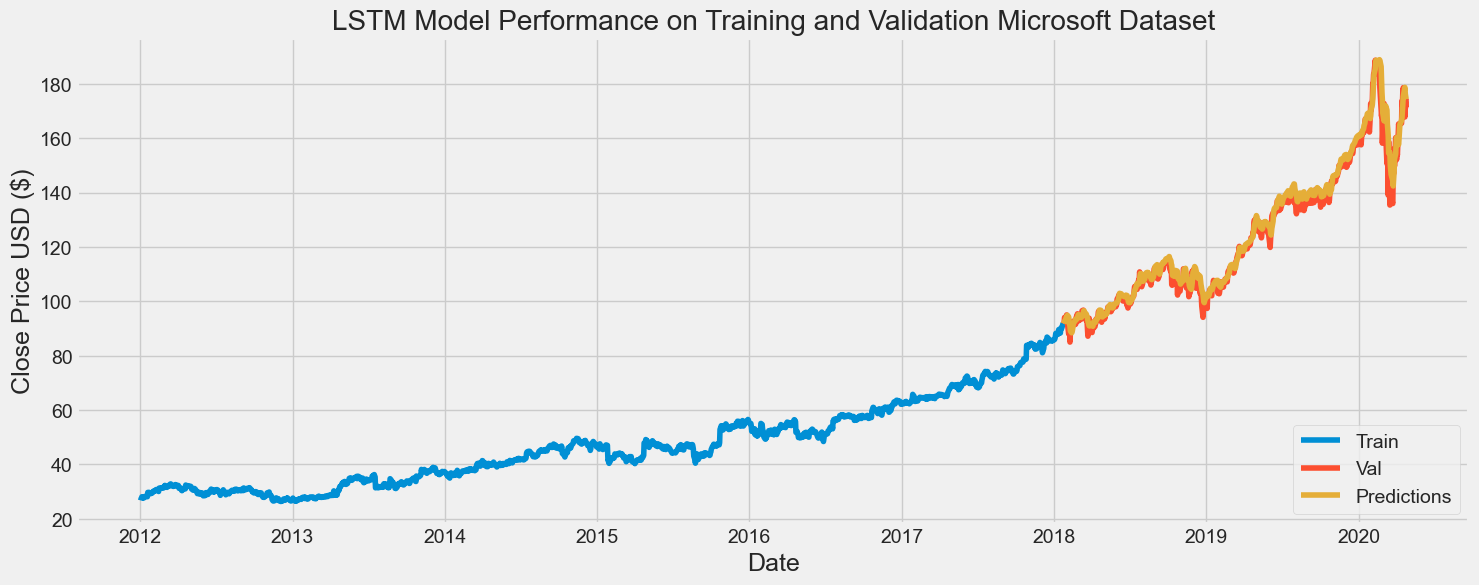

In [69]:
# Plot the data
ms_LSTM_train = ms_data[:ms_length_train+60]
ms_LSTM_valid = ms_data[ms_length_train+60:ms_length_train+ms_length_validation]
ms_LSTM_valid['Predictions'] = ms_LSTM_y_pred_val
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model Performance on Training and Validation Microsoft Dataset')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(ms_LSTM_train['Close'])
plt.plot(ms_LSTM_valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [70]:
# Get the models predicted price values 
ms_LSTM_y_pred_test = ms_model_LSTM.predict(ms_X_test)
ms_LSTM_y_pred_test = scaler.inverse_transform(ms_LSTM_y_pred_test)

# Get the root mean squared error (RMSE)
ms_y_test_inv = scaler.inverse_transform(ms_y_test)
ms_LSTM_test_rmse = np.sqrt(np.mean(((ms_LSTM_y_pred_test - ms_y_test_inv) ** 2)))

print("Microsoft LSTM Test RMSE :",ms_LSTM_test_rmse)

27/27 [==============================] - 0s 17ms/step
Microsoft LSTM Test RMSE : 8.956600786197464


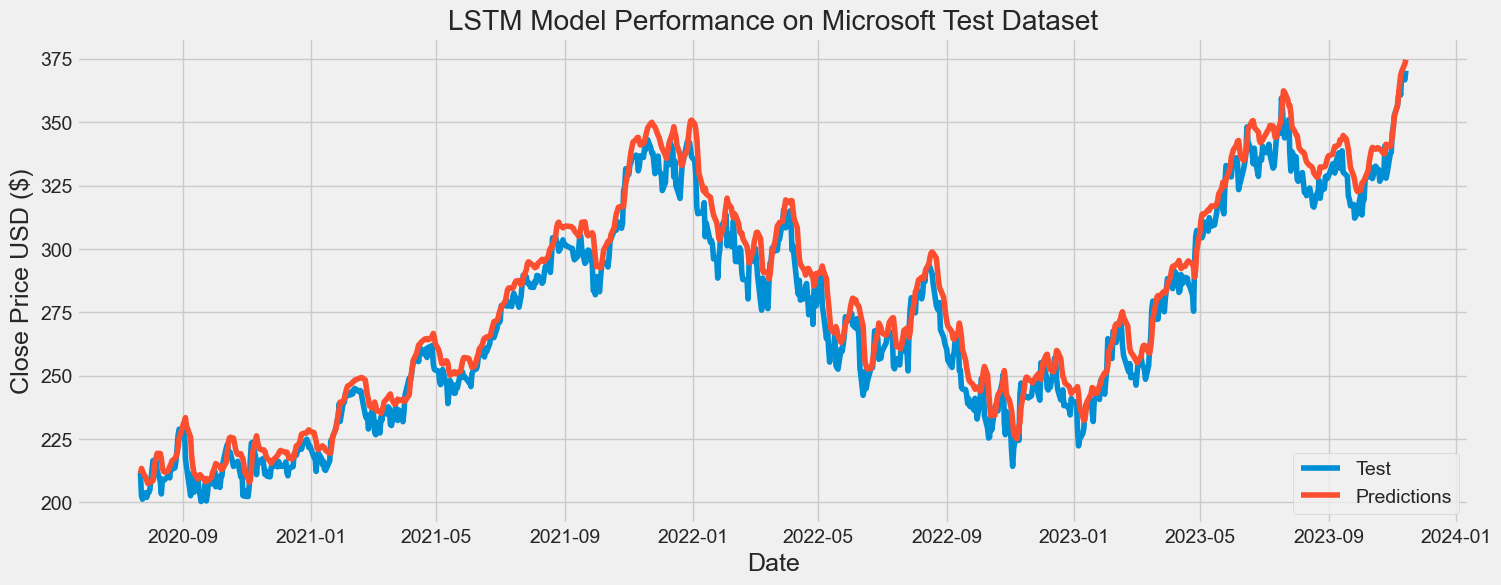

In [71]:
# Plot the data
ms_LSTM_test = ms_data[ms_length_train+60+ms_length_validation:]
ms_LSTM_test['Predictions'] = ms_LSTM_y_pred_test
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model Performance on Microsoft Test Dataset')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(ms_LSTM_test['Close'])
plt.plot(ms_LSTM_test['Predictions'])
plt.legend(['Test', 'Predictions'], loc='lower right')
plt.show()

## GRU

In [72]:
# The GRU architecture
ms_model_GRU = Sequential()
# First GRU layer with Dropout regularisation
ms_model_GRU.add(GRU(units=60, return_sequences=True, input_shape=(ms_X_train.shape[1],1), activation='tanh'))
ms_model_GRU.add(Dropout(0.2))
# Second GRU layer
ms_model_GRU.add(GRU(units=60, return_sequences=True, input_shape=(ms_X_train.shape[1],1), activation='tanh'))
ms_model_GRU.add(Dropout(0.2))
# Third GRU layer
ms_model_GRU.add(GRU(units=60, return_sequences=True, input_shape=(ms_X_train.shape[1],1), activation='tanh'))
ms_model_GRU.add(Dropout(0.2))
# Fourth GRU layer
ms_model_GRU.add(GRU(units=60, activation='tanh'))
ms_model_GRU.add(Dropout(0.2))
# The output layer
ms_model_GRU.add(Dense(units=1))

# compiling the model

ms_model_GRU.compile(optimizer='adam', loss='mean_squared_error', metrics = ["accuracy"])
# fitting the model

ms_history3 = ms_model_GRU.fit(ms_X_train, ms_y_train, epochs=50, batch_size=32)


Epoch 1/50
44/44 [==============================] - 14s 97ms/step - loss: 5.8275e-04 - accuracy: 7.1225e-04
Epoch 2/50
44/44 [==============================] - 1s 25ms/step - loss: 3.4642e-05 - accuracy: 7.1225e-04
Epoch 3/50
44/44 [==============================] - 1s 26ms/step - loss: 1.8654e-05 - accuracy: 7.1225e-04
Epoch 4/50
44/44 [==============================] - 1s 27ms/step - loss: 1.7277e-05 - accuracy: 7.1225e-04
Epoch 5/50
44/44 [==============================] - 1s 26ms/step - loss: 1.4823e-05 - accuracy: 7.1225e-04
Epoch 6/50
44/44 [==============================] - 1s 26ms/step - loss: 1.5402e-05 - accuracy: 7.1225e-04
Epoch 7/50
44/44 [==============================] - 1s 25ms/step - loss: 1.5339e-05 - accuracy: 7.1225e-04
Epoch 8/50
44/44 [==============================] - 1s 26ms/step - loss: 1.4126e-05 - accuracy: 7.1225e-04
Epoch 9/50
44/44 [==============================] - 1s 25ms/step - loss: 1.4483e-05 - accuracy: 7.1225e-04
Epoch 10/50
44/44 [=================

In [73]:
# Get the models predicted price values 
ms_GRU_y_pred_val = ms_model_GRU.predict(ms_X_val)
ms_GRU_y_pred_val = scaler.inverse_transform(ms_GRU_y_pred_val)

# Get the root mean squared error (RMSE)
ms_y_val_inv = scaler.inverse_transform(ms_y_val)
ms_GRU_val_rmse = np.sqrt(np.mean(((ms_GRU_y_pred_val - ms_y_val_inv) ** 2)))

print("Microsoft GRU Validation RMSE :",ms_GRU_val_rmse)

18/18 [==============================] - 3s 38ms/step
Microsoft GRU Validation RMSE : 4.791966346914303


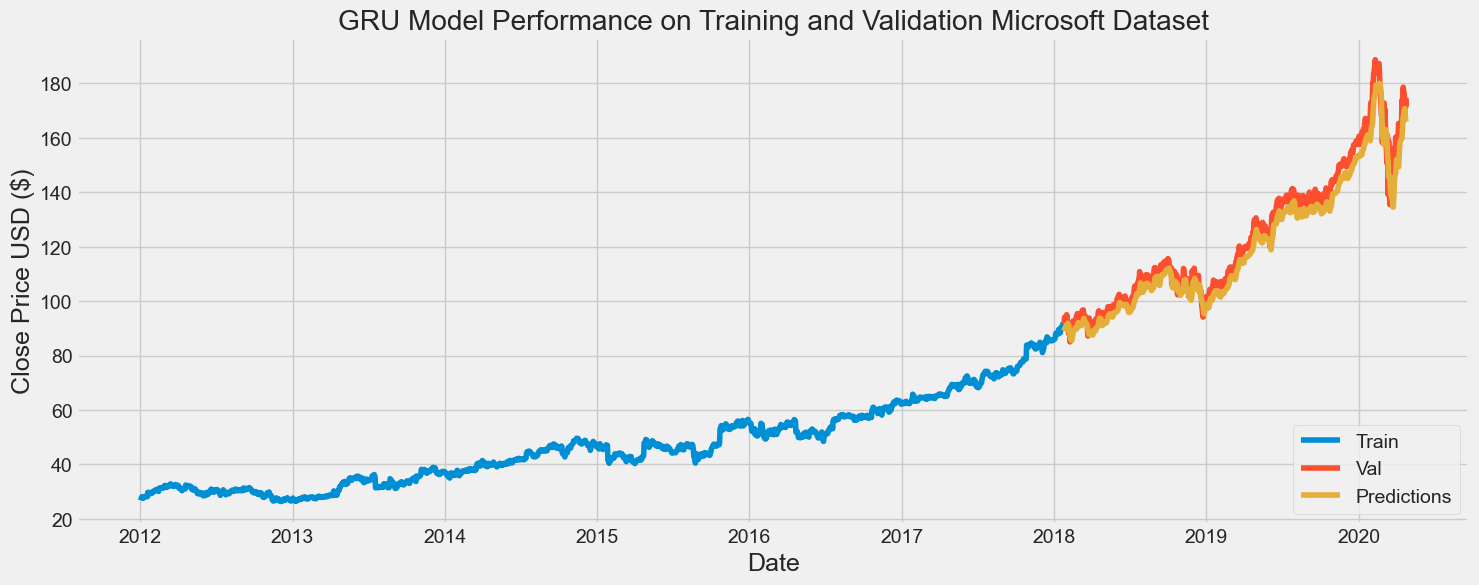

In [74]:
# Plot the data
ms_GRU_train = ms_data[:ms_length_train+60]
ms_GRU_valid = ms_data[ms_length_train+60:ms_length_train+ms_length_validation]
ms_GRU_valid['Predictions'] = ms_GRU_y_pred_val
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('GRU Model Performance on Training and Validation Microsoft Dataset')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(ms_GRU_train['Close'])
plt.plot(ms_GRU_valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [75]:
# Get the models predicted price values 
ms_GRU_y_pred_test = ms_model_GRU.predict(ms_X_test)
ms_GRU_y_pred_test = scaler.inverse_transform(ms_GRU_y_pred_test)

# Get the root mean squared error (RMSE)
ms_y_test_inv = scaler.inverse_transform(ms_y_test)
ms_GRU_test_rmse = np.sqrt(np.mean(((ms_GRU_y_pred_test - ms_y_test_inv) ** 2)))

print("Microsoft GRU Test RMSE :",ms_GRU_test_rmse)

27/27 [==============================] - 1s 27ms/step
Microsoft GRU Test RMSE : 14.569570983201006


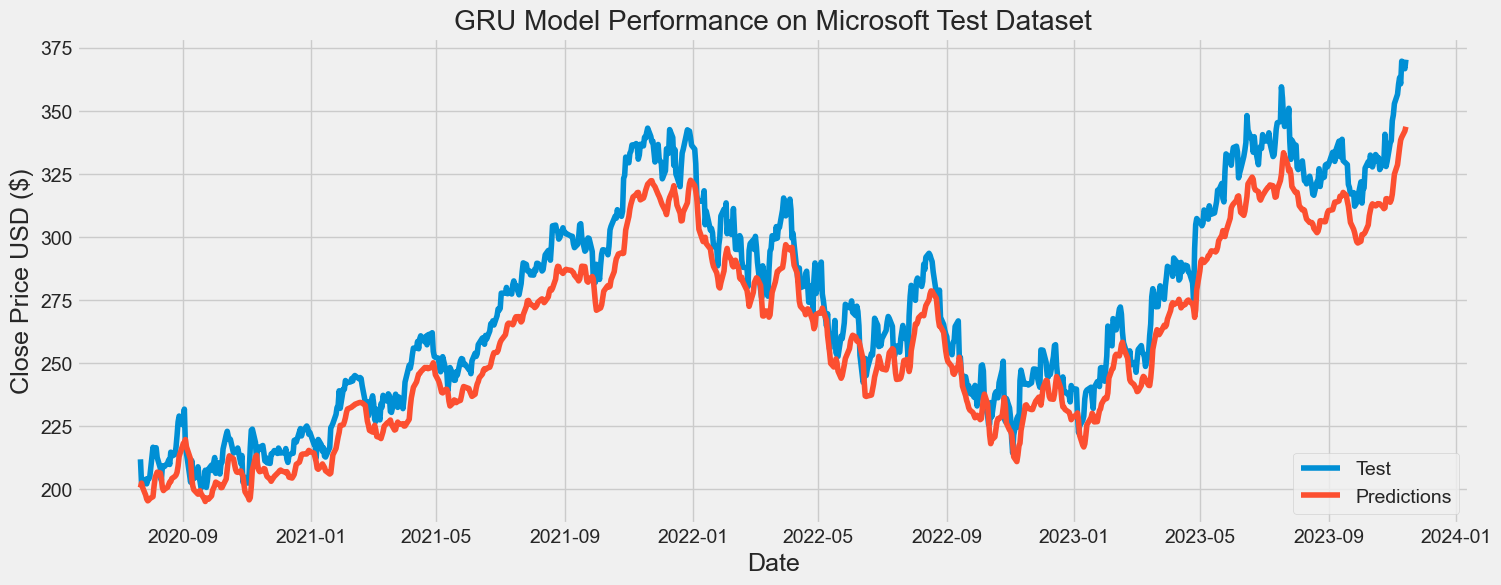

In [76]:
# Plot the data
ms_GRU_test = ms_data[ms_length_train+60+ms_length_validation:]
ms_GRU_test['Predictions'] = ms_GRU_y_pred_test
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('GRU Model Performance on Microsoft Test Dataset')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(ms_GRU_test['Close'])
plt.plot(ms_GRU_test['Predictions'])
plt.legend(['Test', 'Predictions'], loc='lower right')
plt.show()